In [1]:
#import the necessary modules
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.metrics import f1_score,roc_curve,roc_auc_score
import time
from sklearn.linear_model import LogisticRegression
import warnings
warnings.simplefilter('ignore')

In [18]:
source_df = pd.read_csv('loan_approval_dataset.csv')
source_df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [19]:
print(len(source_df))

4269


In [20]:
source_df.isna().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [21]:
source_df.dtypes

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

In [22]:
def trim_column_name(column_name):
    return column_name.strip()  # Using the strip() method to remove leading and trailing whitespaces

source_df.rename(columns=trim_column_name, inplace=True)

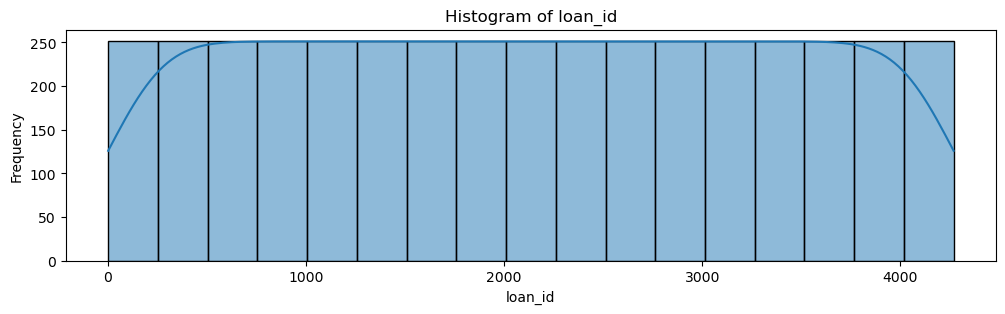

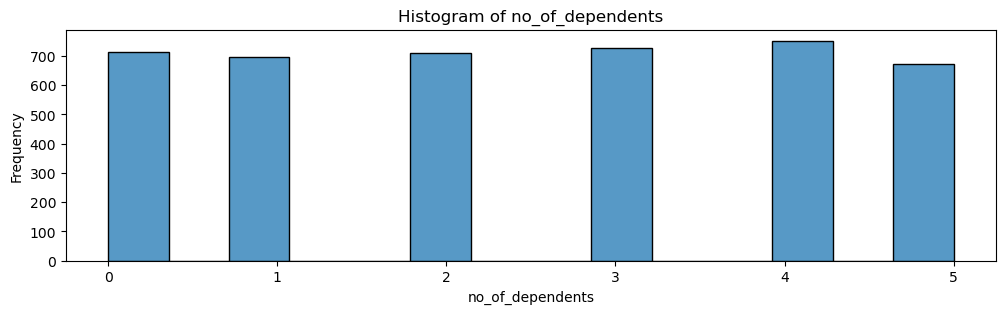

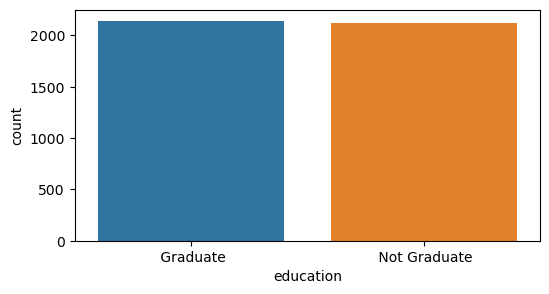

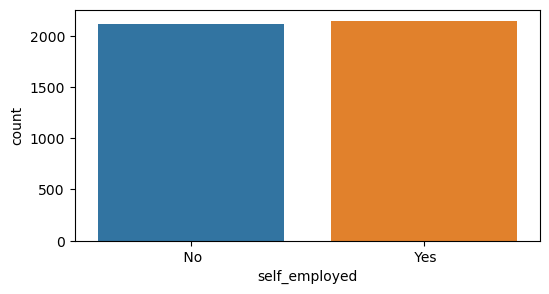

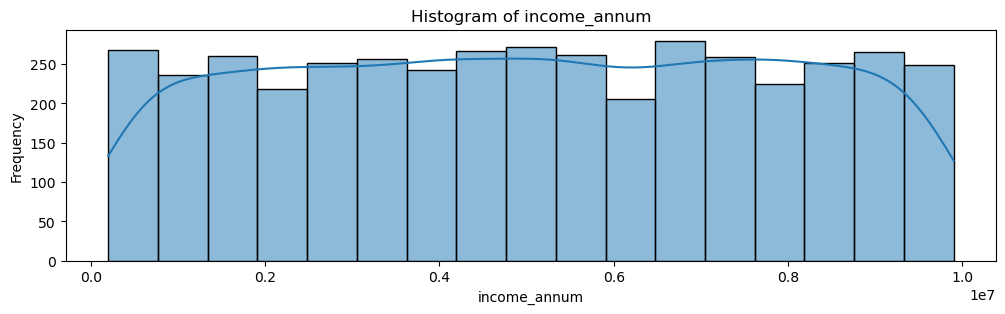

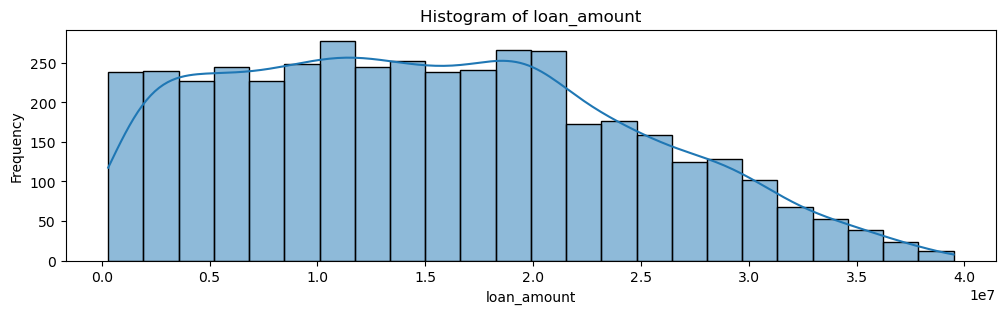

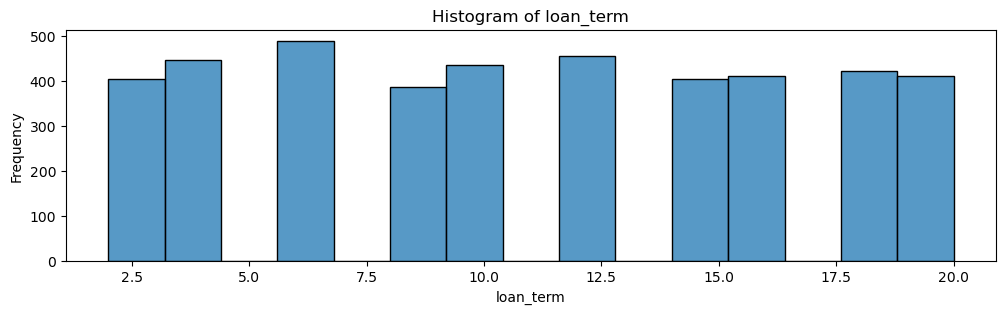

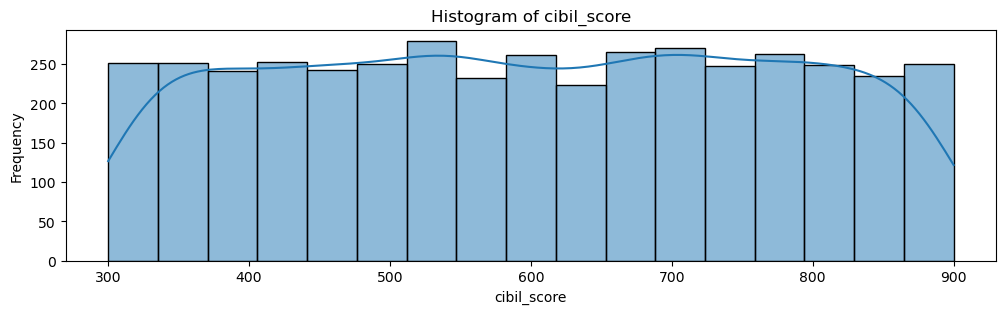

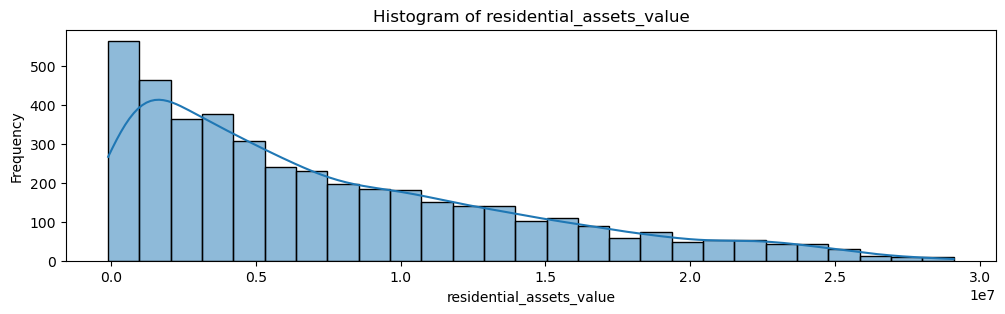

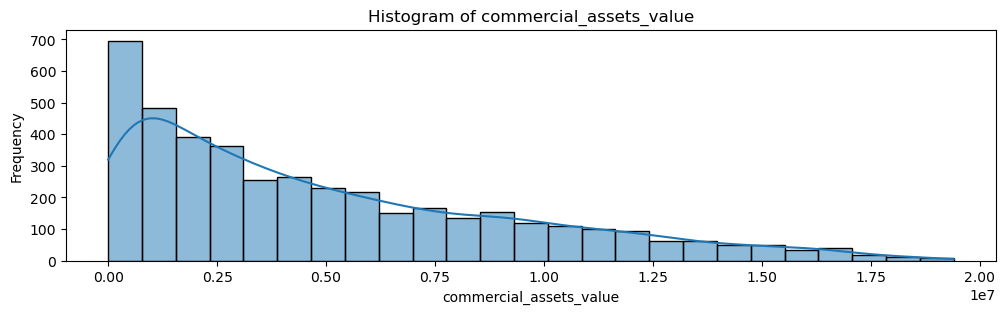

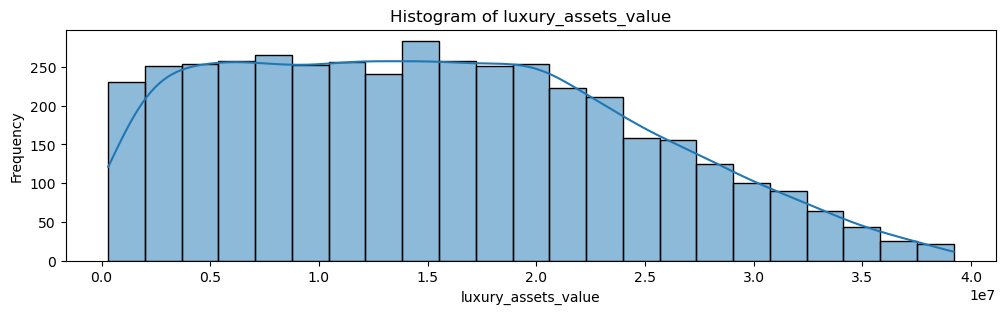

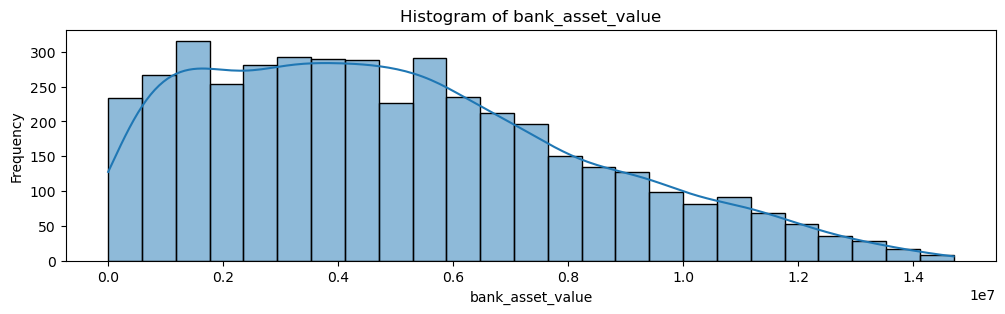

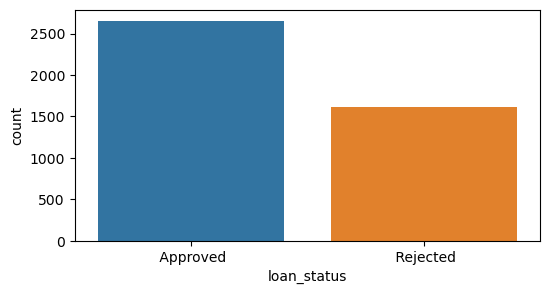

In [23]:
#plot the histograms and count distribution for all the present attributes
for column_name, column_data_type in source_df.dtypes.items():
    if column_data_type=='object' :
        plt.figure(figsize=(6, 3))
        sns.countplot(x=column_name,data=source_df)
    else:
        plt.figure(figsize=(12, 3))
        sns.histplot(source_df[column_name], kde=(len(source_df[column_name].unique())>10) )
        plt.xlabel(column_name)
        plt.ylabel('Frequency')
        plt.title("Histogram of "+column_name)

In [24]:
logs=['loan_amount','residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value'] #log transform due to distribution shape
for l in logs:
    source_df[l] = np.log(source_df[l])

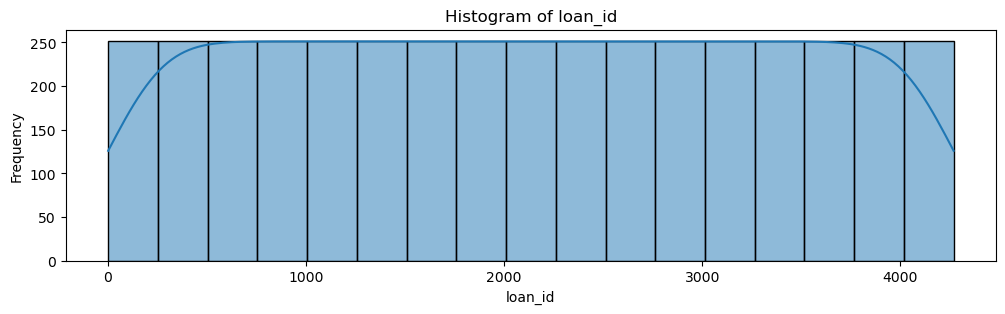

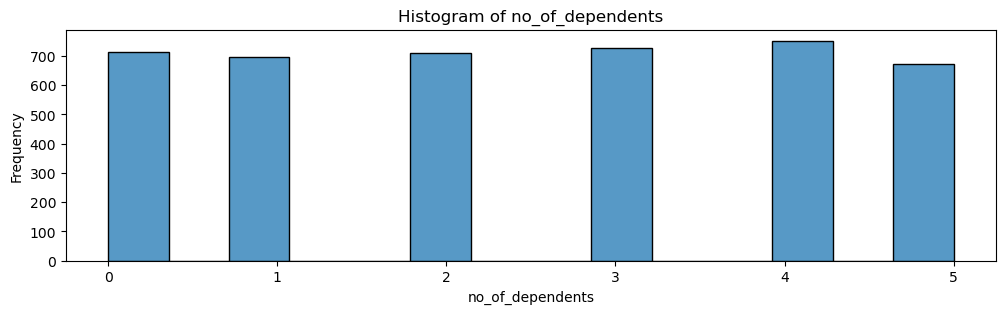

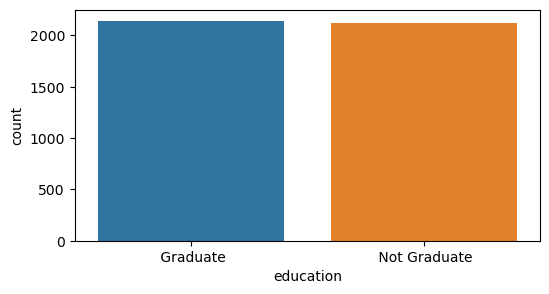

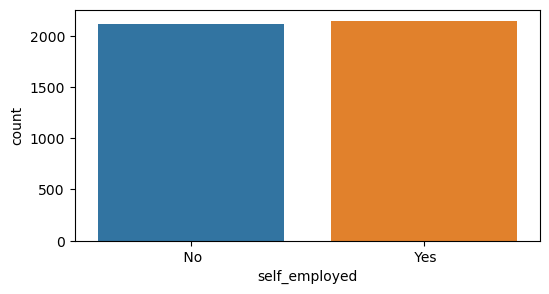

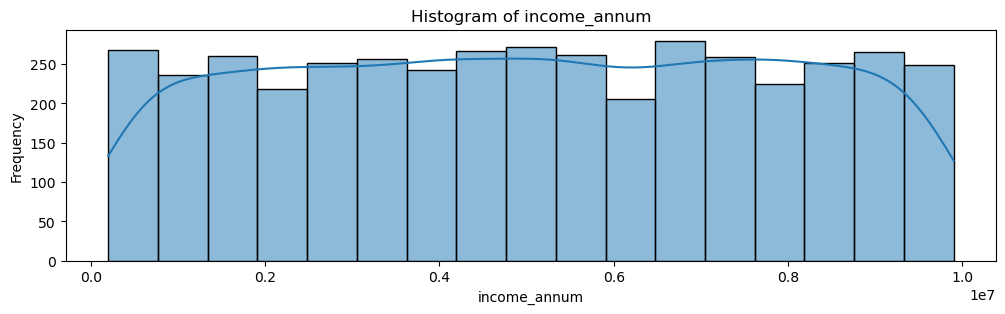

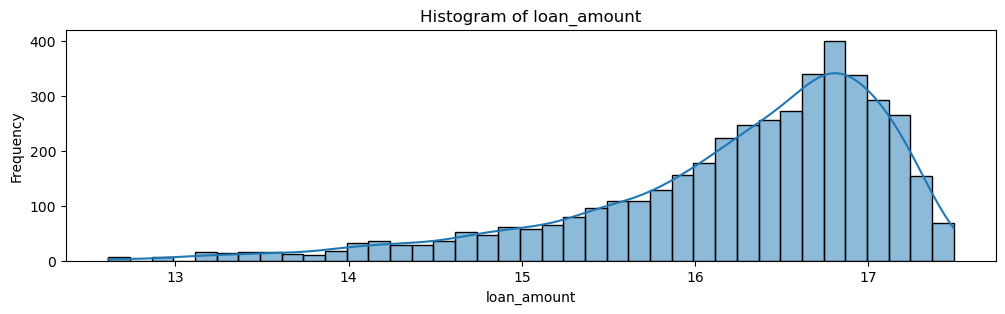

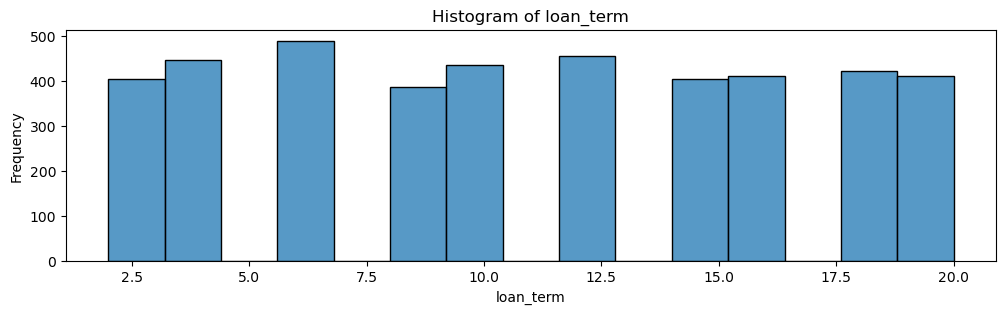

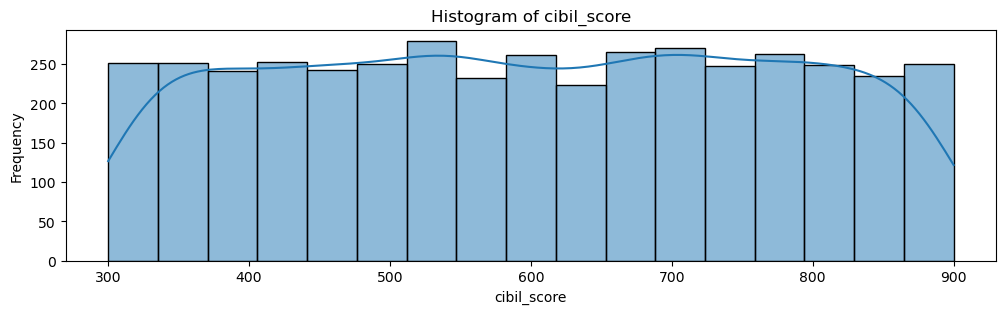

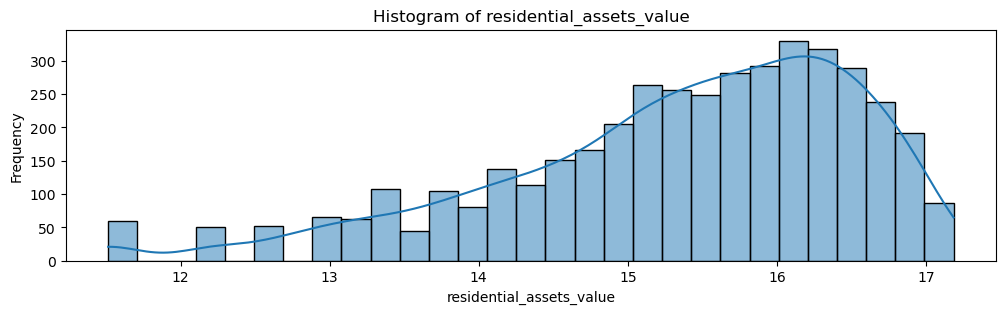

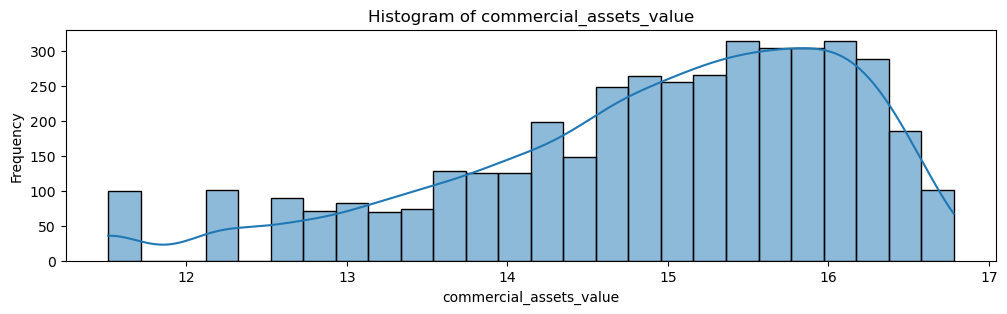

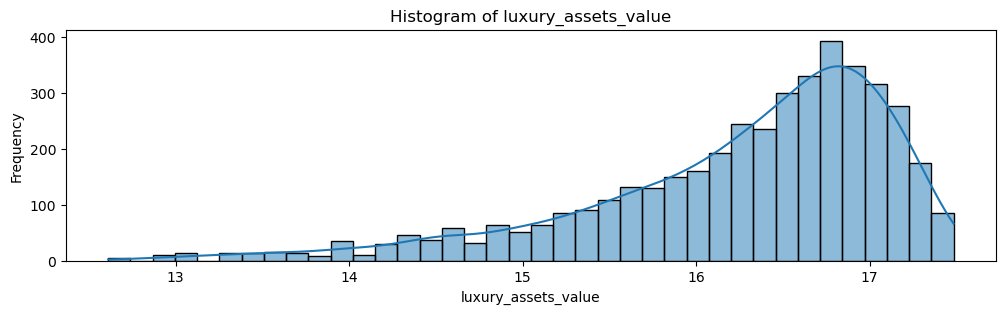

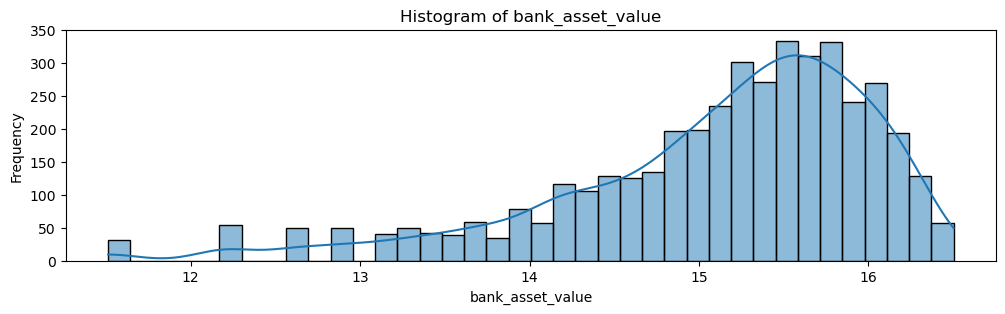

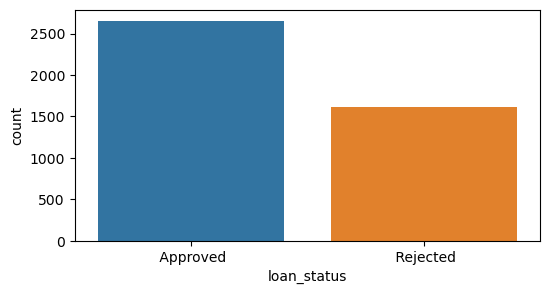

In [25]:
#plot the histograms and count distribution for all the present attributes
for column_name, column_data_type in source_df.dtypes.items():
    if column_data_type=='object' :
        plt.figure(figsize=(6, 3))
        sns.countplot(x=column_name,data=source_df)
    else:
        plt.figure(figsize=(12, 3))
        sns.histplot(source_df[column_name], kde=(len(source_df[column_name].unique())>10) )
        plt.xlabel(column_name)
        plt.ylabel('Frequency')
        plt.title("Histogram of "+column_name)

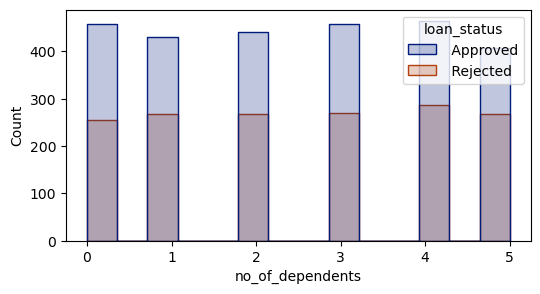

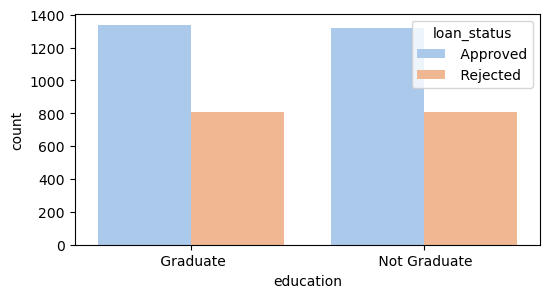

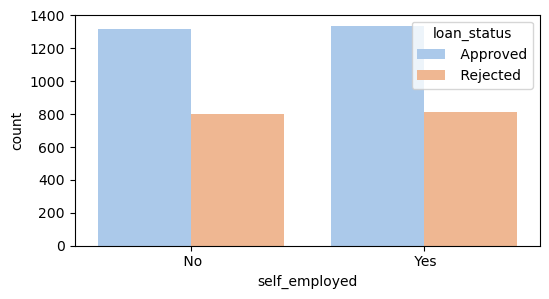

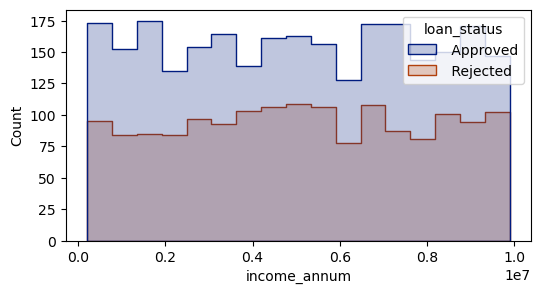

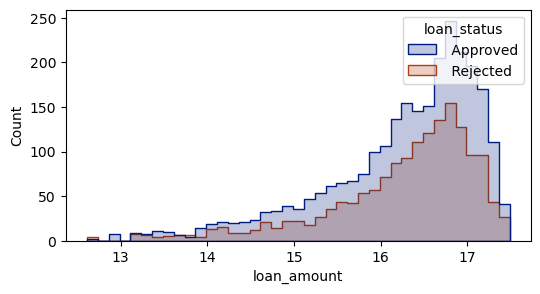

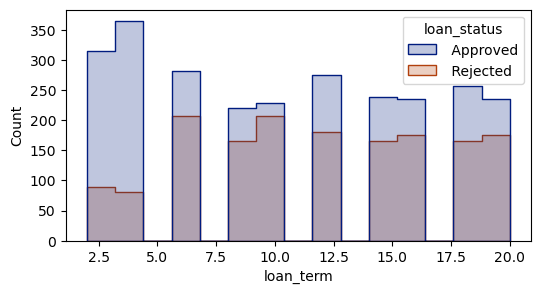

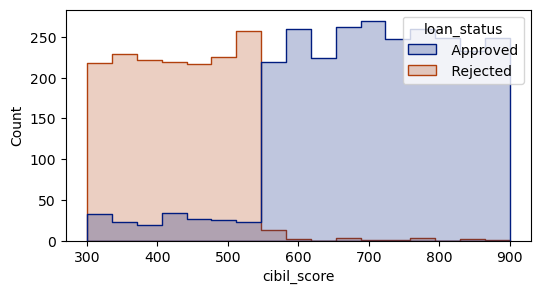

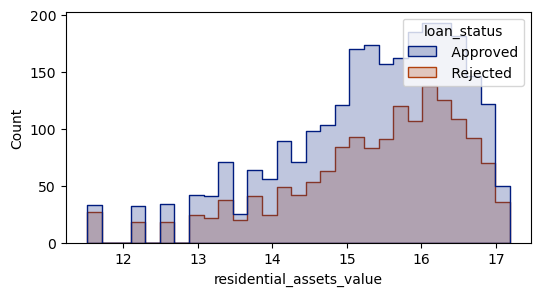

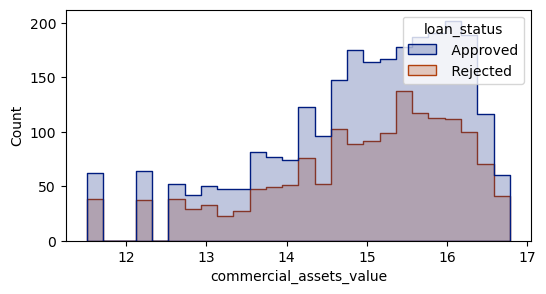

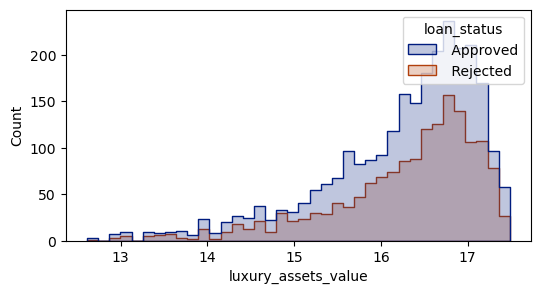

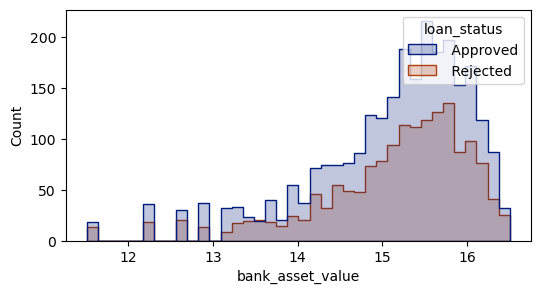

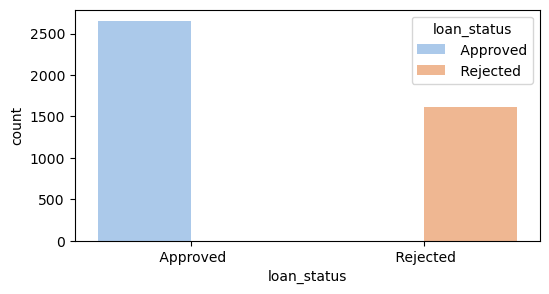

In [43]:
#plot the distribution of the fields with respect to the satisfaction level of the customer
for column_name, column_data_type in source_df.dtypes.items():
    if column_data_type=='object' :
        plt.figure(figsize=(6, 3))
        sns.countplot(data=source_df,x=column_name,hue=source_df.columns[-1],palette='pastel')
        plt.show()
    else: 
        plt.figure(figsize=(6, 3))
        sns.histplot(data=source_df,x=column_name,hue=source_df.columns[-1],element='step',palette='dark')
        plt.show()

In [28]:
source_df=source_df.drop('loan_id',axis=1)
source_df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,17.213369,12,778,14.690979,16.683409,16.937875,15.894952,Approved
1,0,Not Graduate,Yes,4100000,16.316947,8,417,14.808762,14.603968,15.990262,15.009433,Rejected
2,3,Graduate,No,9100000,17.206658,20,506,15.775605,15.319588,17.321068,16.364956,Rejected
3,3,Graduate,No,8200000,17.239773,8,467,16.716932,15.009433,16.963964,15.882373,Rejected
4,5,Not Graduate,Yes,9800000,17.001863,20,382,16.333207,15.919645,17.196505,15.424948,Rejected


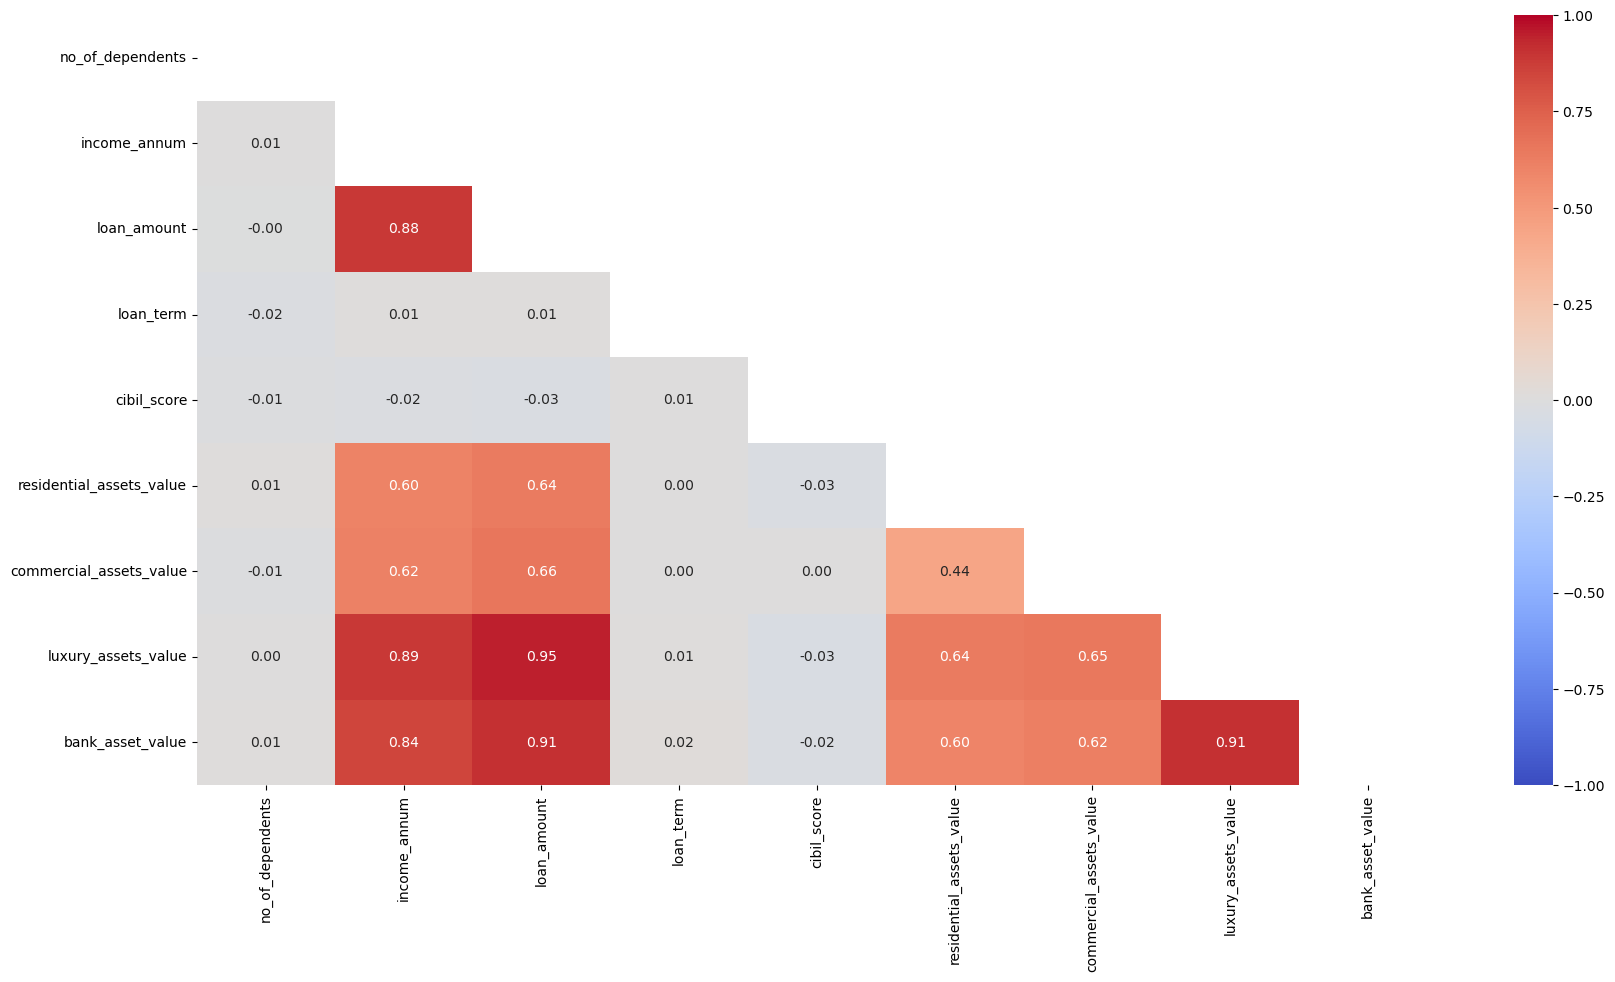

In [40]:
corr_matrix=source_df.corr()
mask_corr = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, mask=mask_corr ,vmax=1, vmin=-1,  cmap="coolwarm", annot=True,fmt=".2f", xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)
plt.show()

<Axes: >

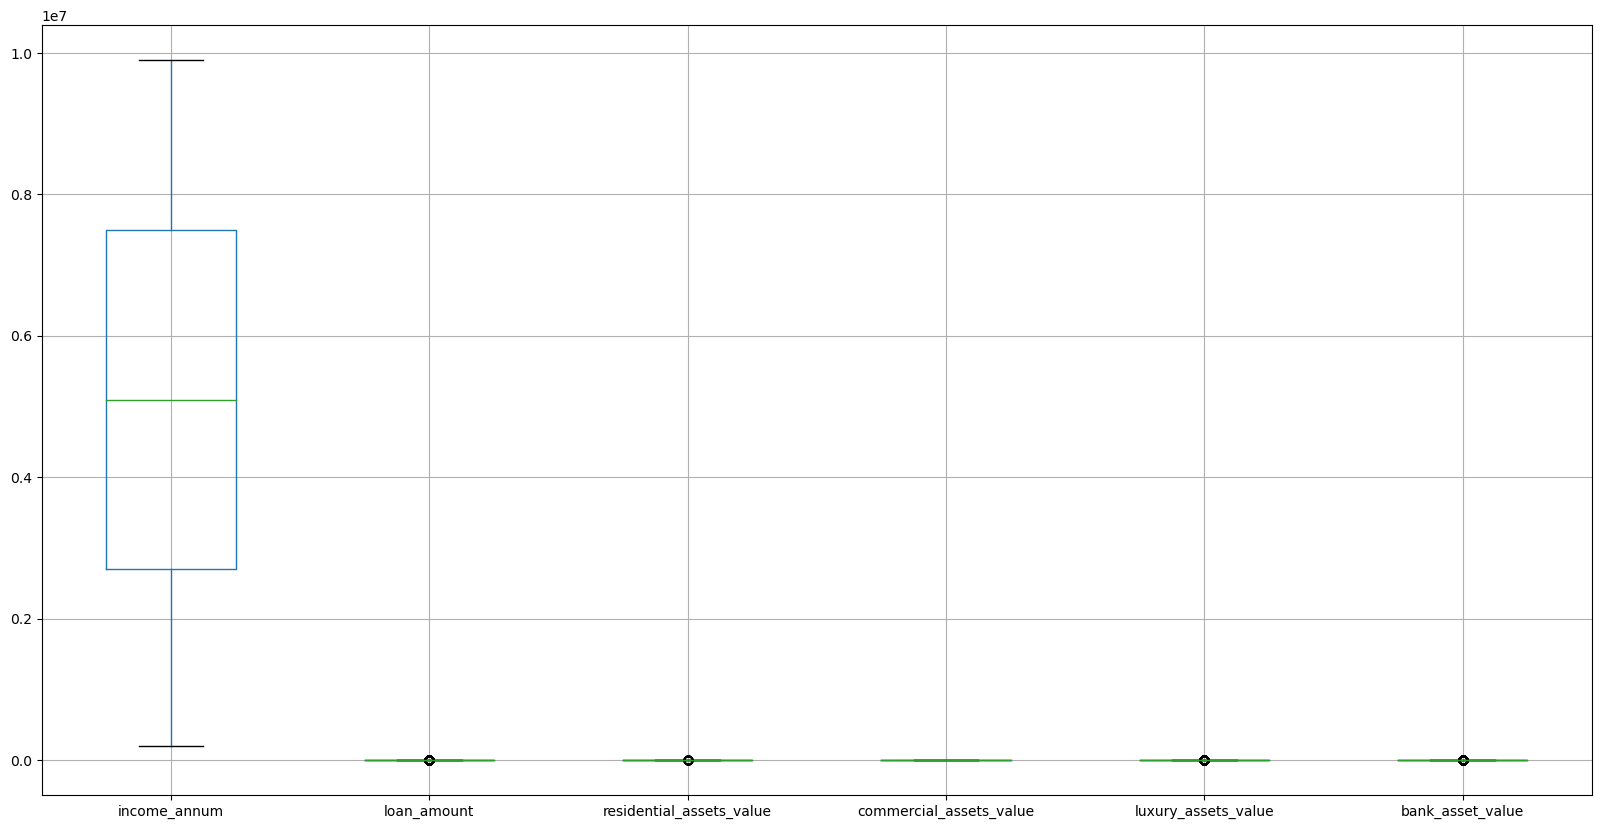

In [44]:
plt.figure(figsize=(20, 10))
source_df[["income_annum","loan_amount","residential_assets_value","commercial_assets_value","luxury_assets_value","bank_asset_value"]].boxplot()

<Axes: >

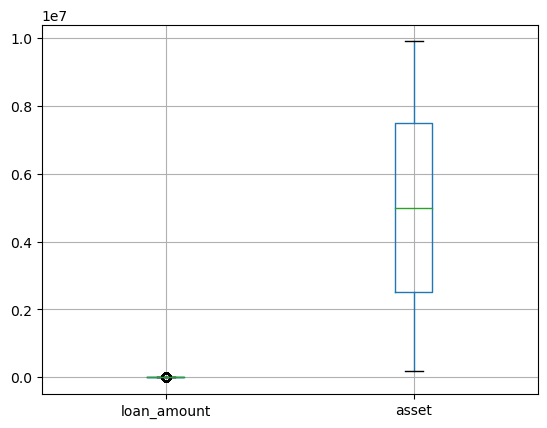

In [45]:
#source_df[["income_annum","loan_amount","residential_assets_value","commercial_assets_value","luxury_assets_value","bank_asset_value"]].boxplot()

pd.DataFrame({"loan_amount" : source_df["loan_amount"],"asset" : (source_df["income_annum"]+source_df["residential_assets_value"]+source_df["commercial_assets_value"]+source_df["luxury_assets_value"]+source_df["bank_asset_value"]) }).boxplot()

<Axes: >

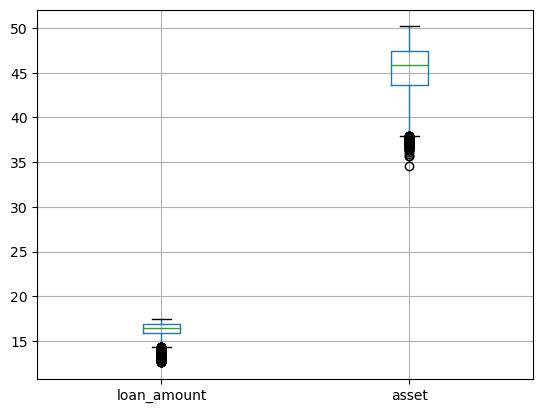

In [46]:
#source_df[["income_annum","loan_amount","residential_assets_value","commercial_assets_value","luxury_assets_value","bank_asset_value"]].boxplot()

pd.DataFrame({"loan_amount" : source_df["loan_amount"],"asset" : (source_df["residential_assets_value"]+source_df["commercial_assets_value"]+source_df["bank_asset_value"]) }).boxplot()

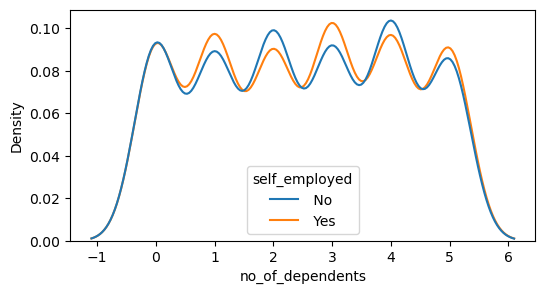

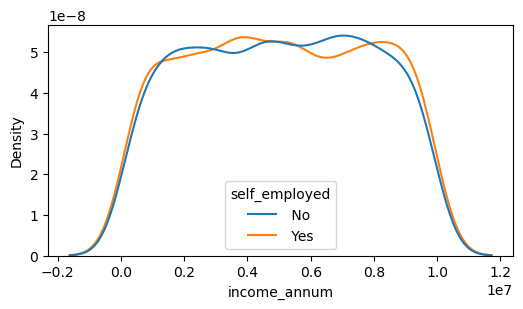

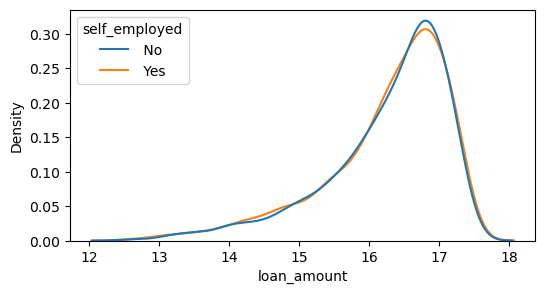

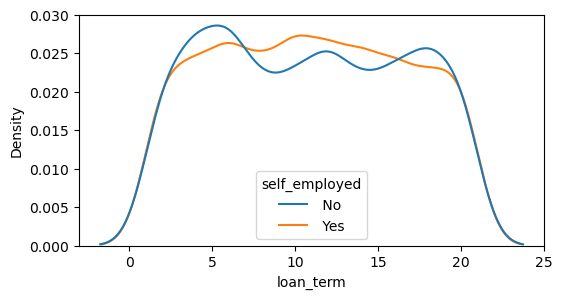

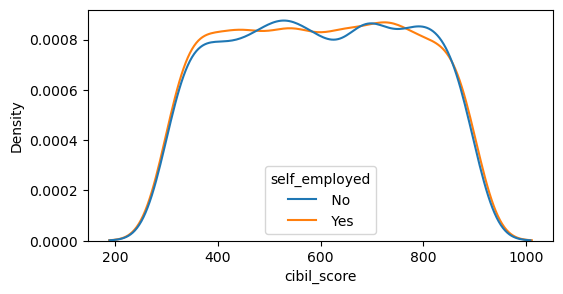

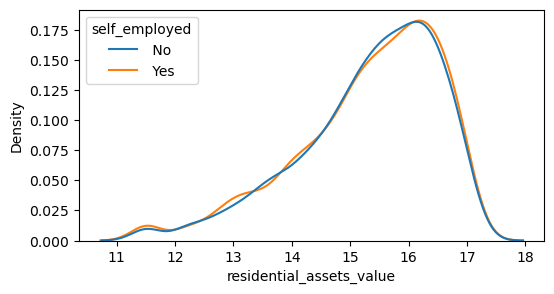

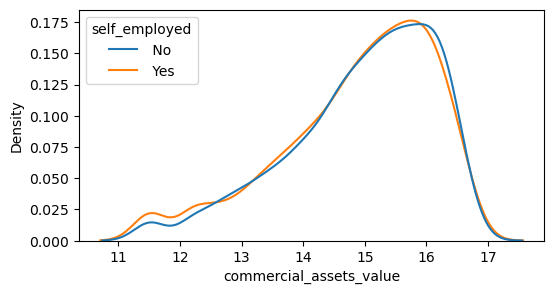

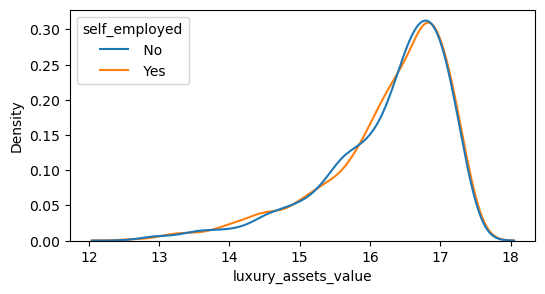

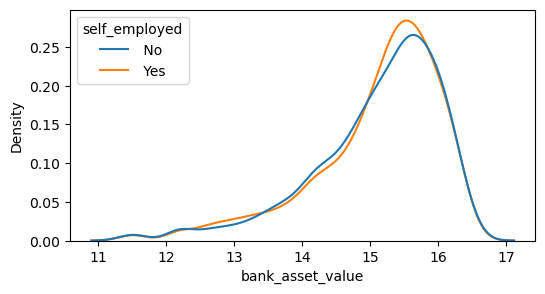

In [47]:
#plot the distribution of the fields with respect to the satisfaction level of the customer
for column_name, column_data_type in source_df.dtypes.items():
    if column_data_type!='object' :
        plt.figure(figsize=(6, 3))
        sns.kdeplot(data=source_df,x=column_name,hue=source_df.columns[2])
        plt.show()

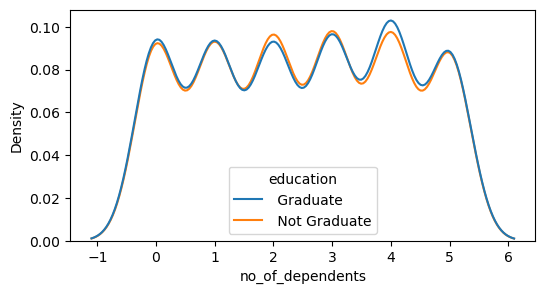

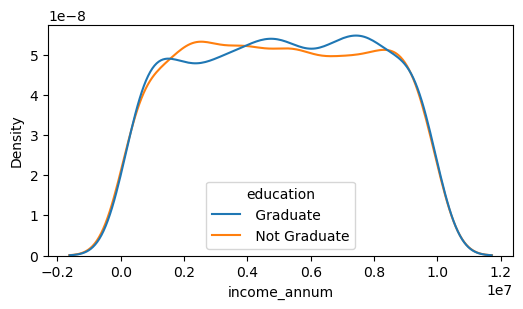

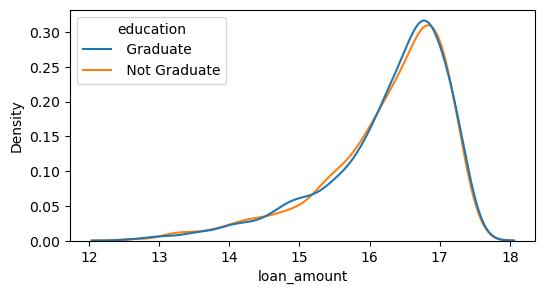

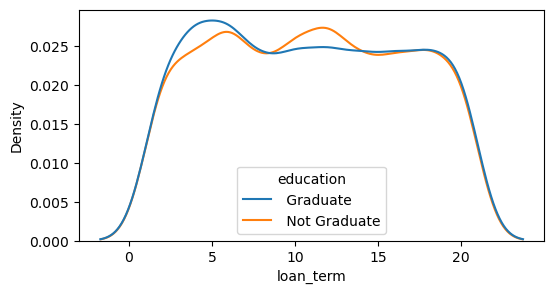

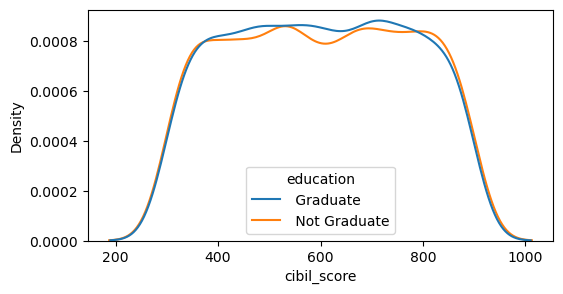

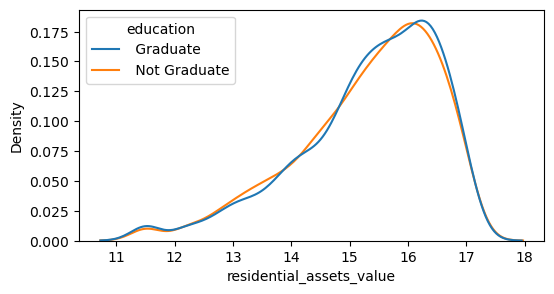

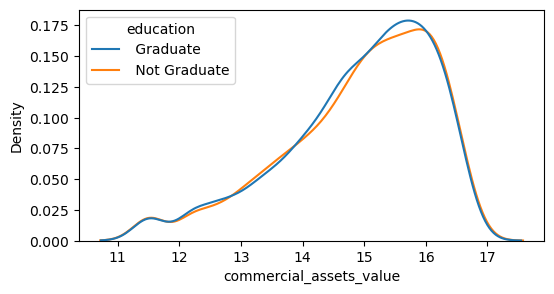

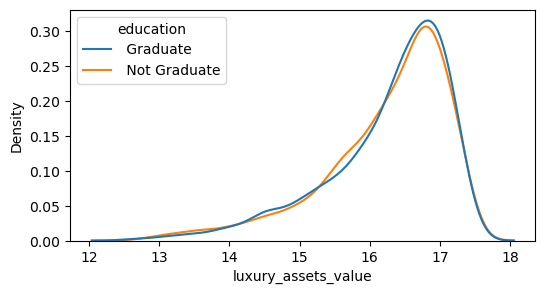

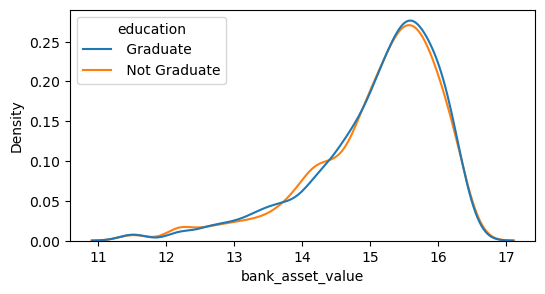

In [48]:
#plot the distribution of the fields with respect to the satisfaction level of the customer
for column_name, column_data_type in source_df.dtypes.items():
    if column_data_type!='object' :
        plt.figure(figsize=(6, 3))
        sns.kdeplot(data=source_df,x=column_name,hue=source_df.columns[1])
        plt.show()

In [143]:
source_df = pd.read_csv('loan_approval_dataset.csv')
source_df.rename(columns=trim_column_name, inplace=True)

In [144]:
source_df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [91]:
#source_df["income_annum_binned"], income_annum_bins = pd.qcut(source_df["income_annum"], 5, retbins=True)

In [145]:
source_df["cibil_score_binned"], cibil_score_bins = pd.qcut(source_df["cibil_score"], 5, retbins=True)

In [147]:
source_df["loan_term_binned"], loan_term_bins = pd.qcut(source_df["loan_term"], 5, retbins=True)

In [148]:
source_df["loan_amount_binned"], loan_amount_bins = pd.qcut(source_df["loan_amount"], 5, retbins=True)

In [149]:
source_df["commercial_assets_value_binned"], commercial_assets_value_bins = pd.qcut(source_df["commercial_assets_value"], 5, retbins=True)

In [150]:
source_df["residential_assets_value_binned"], residential_assets_value_bins = pd.qcut(source_df["residential_assets_value"], 5, retbins=True)

In [151]:
source_df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,cibil_score_binned,loan_term_binned,loan_amount_binned,commercial_assets_value_binned,residential_assets_value_binned
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,"(663.0, 778.0]","(8.0, 12.0]","(23400000.0, 39500000.0]","(8800000.0, 19400000.0]","(1600000.0, 4100000.0]"
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,"(299.999, 421.0]","(6.0, 8.0]","(11800000.0, 17480000.0]","(1000000.0, 2600000.0]","(1600000.0, 4100000.0]"
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,"(421.0, 541.0]","(16.0, 20.0]","(23400000.0, 39500000.0]","(2600000.0, 5000000.0]","(4100000.0, 7600000.0]"
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,"(421.0, 541.0]","(6.0, 8.0]","(23400000.0, 39500000.0]","(2600000.0, 5000000.0]","(12940000.0, 29100000.0]"
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,"(299.999, 421.0]","(16.0, 20.0]","(23400000.0, 39500000.0]","(5000000.0, 8800000.0]","(7600000.0, 12940000.0]"


In [152]:
source_df.dtypes

loan_id                               int64
no_of_dependents                      int64
education                            object
self_employed                        object
income_annum                          int64
loan_amount                           int64
loan_term                             int64
cibil_score                           int64
residential_assets_value              int64
commercial_assets_value               int64
luxury_assets_value                   int64
bank_asset_value                      int64
loan_status                          object
cibil_score_binned                 category
loan_term_binned                   category
loan_amount_binned                 category
commercial_assets_value_binned     category
residential_assets_value_binned    category
dtype: object

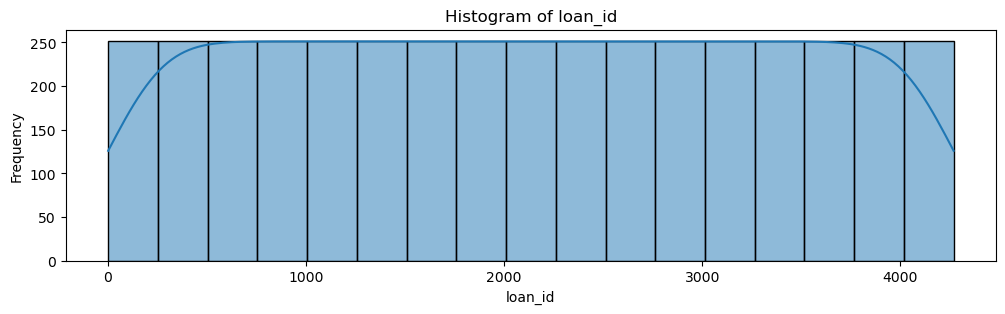

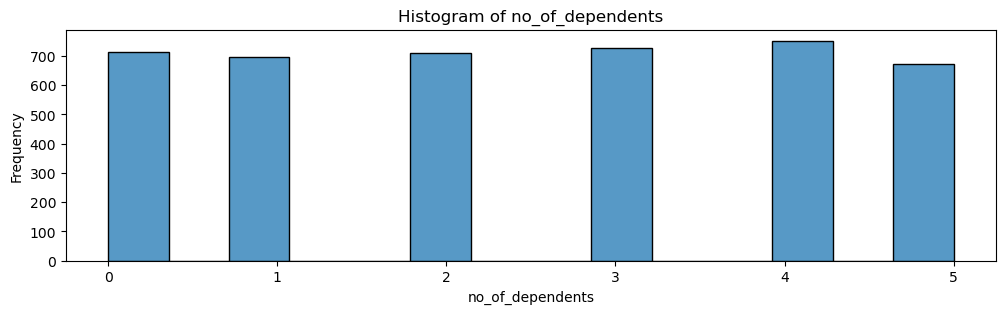

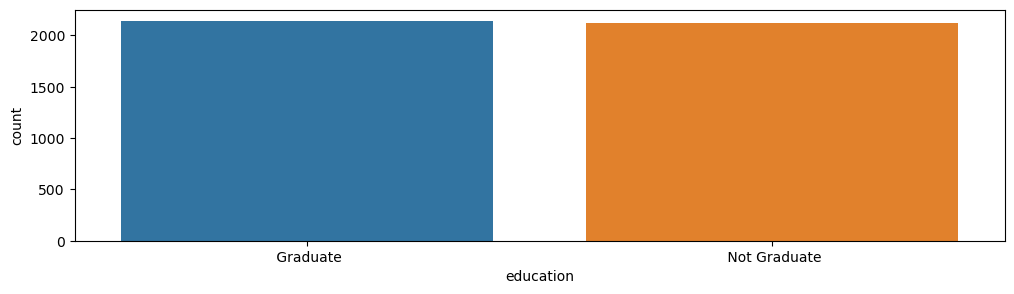

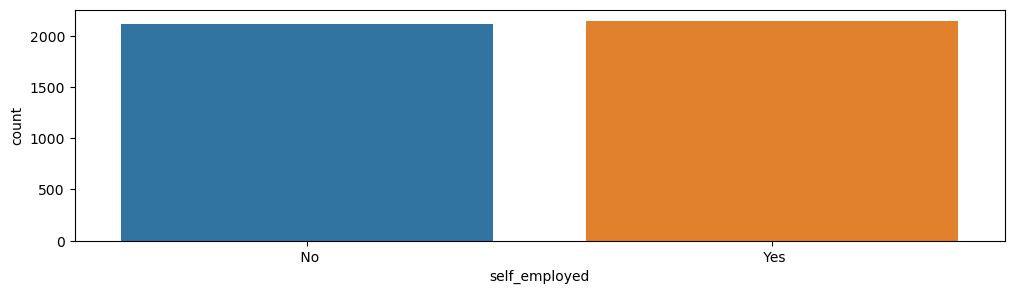

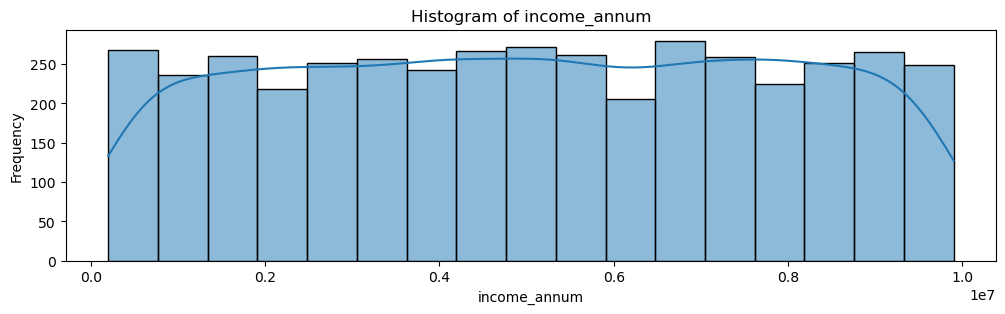

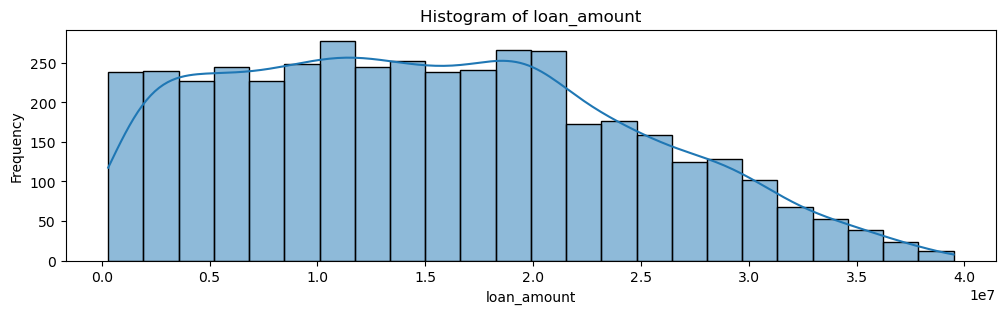

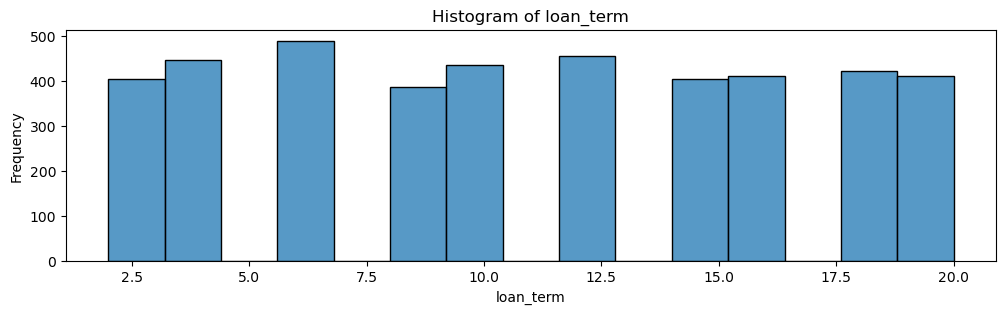

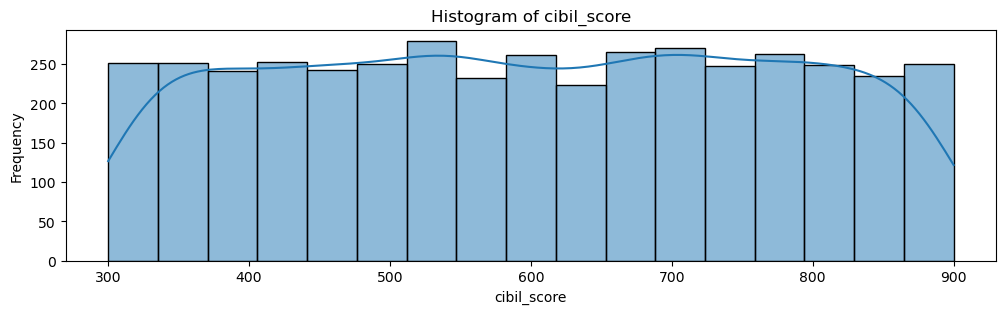

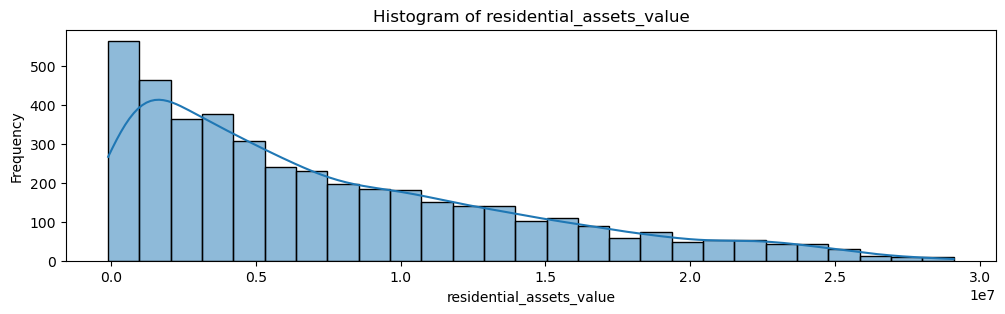

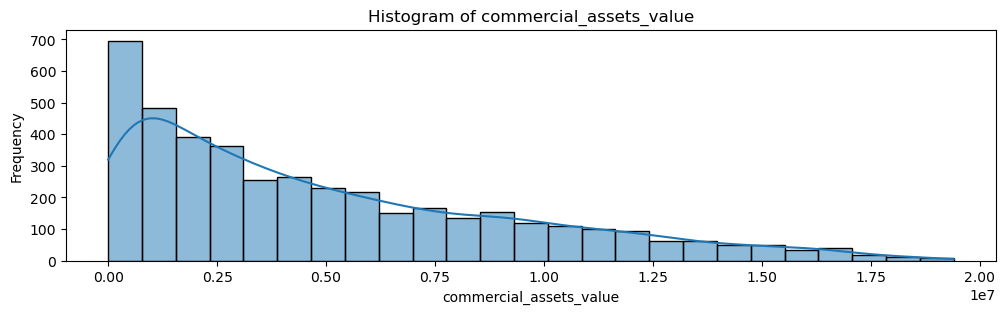

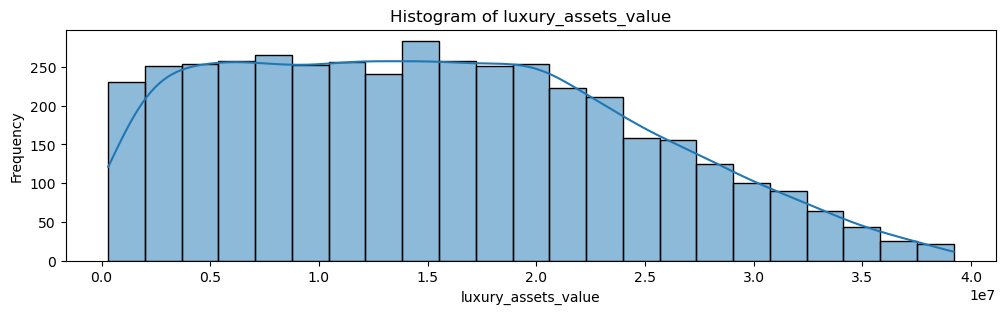

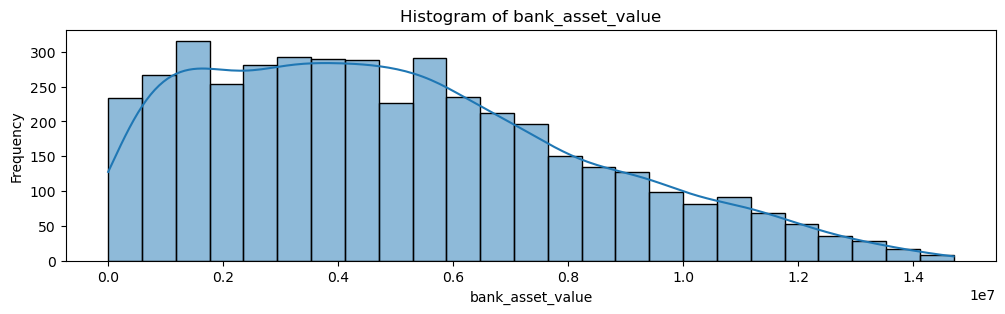

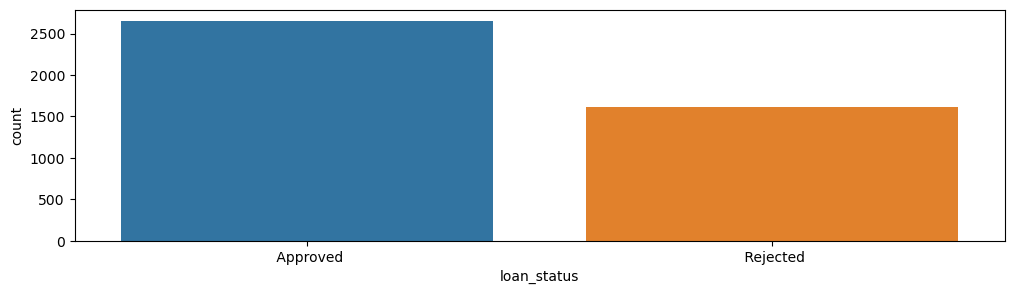

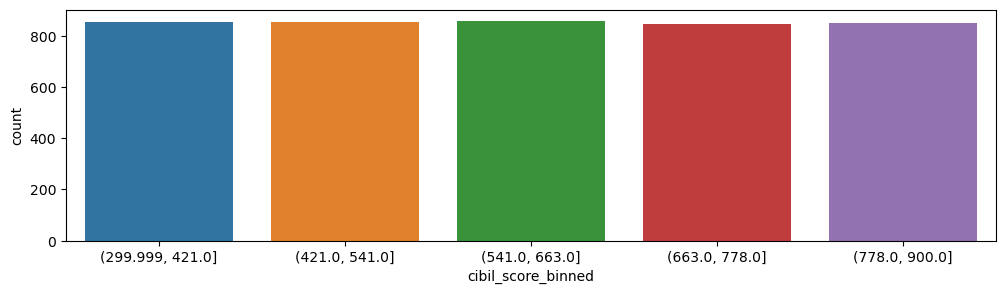

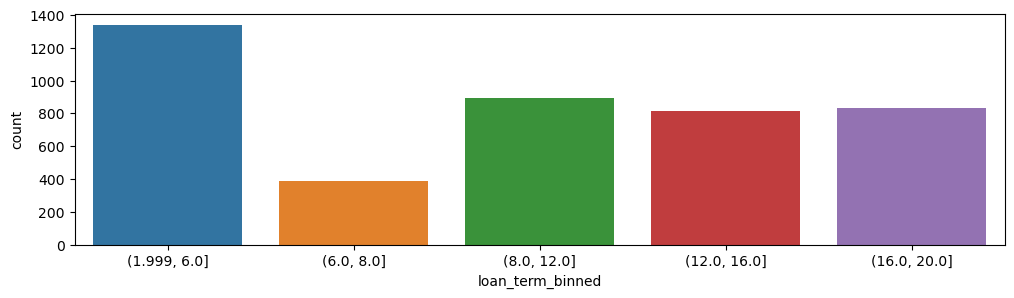

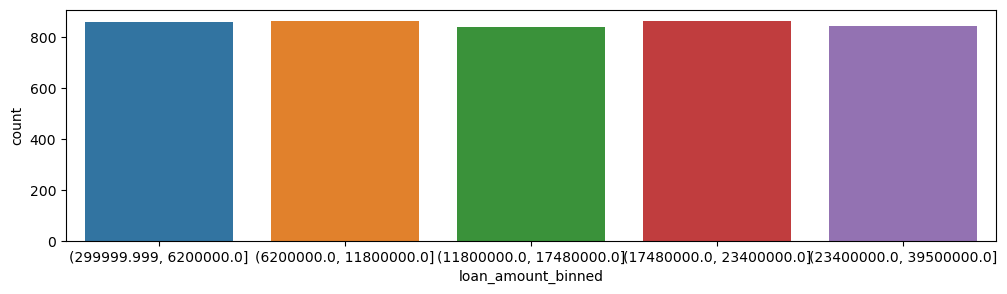

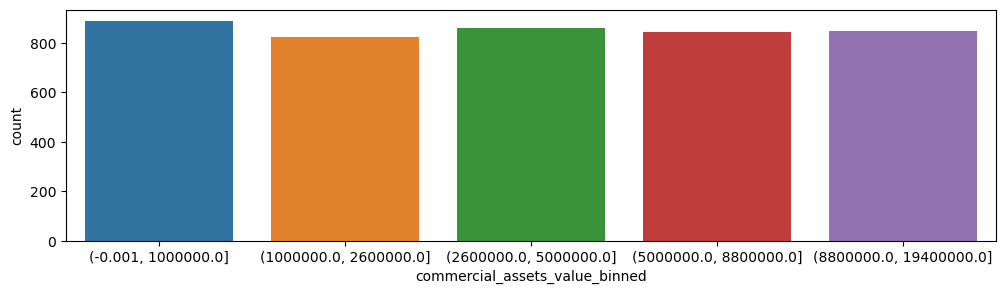

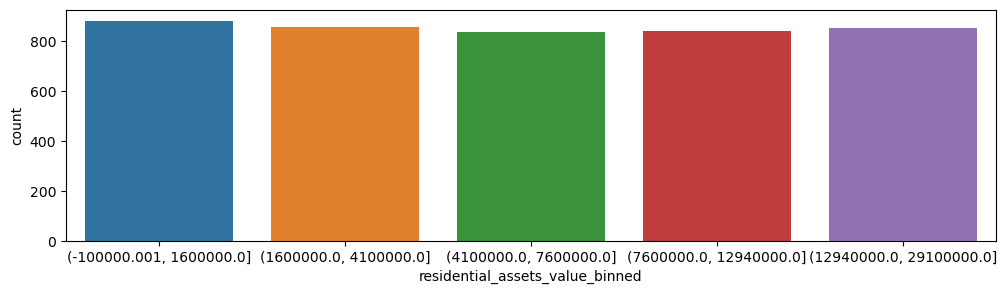

In [153]:
#plot the histograms and count distribution for all the present attributes
for column_name, column_data_type in source_df.dtypes.items():
    if column_data_type in ('object','category')  :
        plt.figure(figsize=(12, 3))
        sns.countplot(x=column_name,data=source_df)
    else:
        plt.figure(figsize=(12, 3))
        sns.histplot(source_df[column_name], kde=(len(source_df[column_name].unique())>10) )
        plt.xlabel(column_name)
        plt.ylabel('Frequency')
        plt.title("Histogram of "+column_name)

In [154]:
#source_df=source_df.drop(columns=["cibil_score","income_annum","loan_amount","loan_term","residential_assets_value","commercial_assets_value","luxury_assets_value","bank_asset_value"])
source_df=source_df.drop(columns=["loan_id","cibil_score","loan_amount","loan_term","residential_assets_value","commercial_assets_value","luxury_assets_value","bank_asset_value"])

In [155]:
Y=source_df['loan_status'].apply(lambda x: 1 if x.strip()=="Approved" else 0 )
X=source_df.drop(columns=["loan_status"])

In [156]:
X_df=pd.get_dummies(X,drop_first=True) 
#Y_df =pd.get_dummies(Y,drop_first=True)

In [157]:
source_df.head()

,no_of_dependents,education,self_employed,income_annum,loan_status,cibil_score_binned,loan_term_binned,loan_amount_binned,commercial_assets_value_binned,residential_assets_value_binned
0,2,Graduate,No,9600000,Approved,"(663.0, 778.0]","(8.0, 12.0]","(23400000.0, 39500000.0]","(8800000.0, 19400000.0]","(1600000.0, 4100000.0]"
1,0,Not Graduate,Yes,4100000,Rejected,"(299.999, 421.0]","(6.0, 8.0]","(11800000.0, 17480000.0]","(1000000.0, 2600000.0]","(1600000.0, 4100000.0]"
2,3,Graduate,No,9100000,Rejected,"(421.0, 541.0]","(16.0, 20.0]","(23400000.0, 39500000.0]","(2600000.0, 5000000.0]","(4100000.0, 7600000.0]"
3,3,Graduate,No,8200000,Rejected,"(421.0, 541.0]","(6.0, 8.0]","(23400000.0, 39500000.0]","(2600000.0, 5000000.0]","(12940000.0, 29100000.0]"
4,5,Not Graduate,Yes,9800000,Rejected,"(299.999, 421.0]","(16.0, 20.0]","(23400000.0, 39500000.0]","(5000000.0, 8800000.0]","(7600000.0, 12940000.0]"


In [158]:
X_df.head()

,no_of_dependents,income_annum,education_ Not Graduate,self_employed_ Yes,"cibil_score_binned_(421.0, 541.0]","cibil_score_binned_(541.0, 663.0]","cibil_score_binned_(663.0, 778.0]","cibil_score_binned_(778.0, 900.0]","loan_term_binned_(6.0, 8.0]","loan_term_binned_(8.0, 12.0]",...,"loan_amount_binned_(17480000.0, 23400000.0]","loan_amount_binned_(23400000.0, 39500000.0]","commercial_assets_value_binned_(1000000.0, 2600000.0]","commercial_assets_value_binned_(2600000.0, 5000000.0]","commercial_assets_value_binned_(5000000.0, 8800000.0]","commercial_assets_value_binned_(8800000.0, 19400000.0]","residential_assets_value_binned_(1600000.0, 4100000.0]","residential_assets_value_binned_(4100000.0, 7600000.0]","residential_assets_value_binned_(7600000.0, 12940000.0]","residential_assets_value_binned_(12940000.0, 29100000.0]"
0,2,9600000,0,0,0,0,1,0,0,1,...,0,1,0,0,0,1,1,0,0,0
1,0,4100000,1,1,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
2,3,9100000,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,3,8200000,0,0,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1
4,5,9800000,1,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0


In [160]:
Y_df=Y
Y_df.value_counts() #Baseline Accuracy=62.21%

1    2656
0    1613
Name: loan_status, dtype: int64

In [161]:
xnames=X_df.columns

In [162]:
X_df = preprocessing.StandardScaler().fit_transform(X_df)

In [163]:
from sklearn.model_selection import train_test_split
train_df, test_df, ytrain, ytest = train_test_split(X_df, Y_df, test_size=0.3, random_state=1)

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       483
           1       0.96      0.93      0.95       798

    accuracy                           0.93      1281
   macro avg       0.93      0.94      0.93      1281
weighted avg       0.94      0.93      0.93      1281



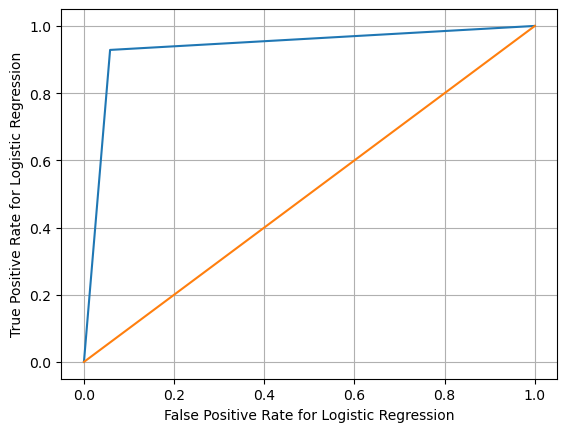



 The AUC for Logistic Regression is : 0.9353002070393375


 The time to run the Logistic Regression model is 0.13774991035461426  seconds


In [164]:
#Logistic Regression

t_start=time.time()
logreg_model = LogisticRegression(random_state=123)
logreg_model.fit(train_df, ytrain)
y_pred = logreg_model.predict(test_df)
print(classification_report(ytest, y_pred))

fpr, tpr, _ = roc_curve(ytest,  y_pred)
auc = roc_auc_score(ytest, y_pred)
plt.figure()
#create ROC curve
plt.plot(fpr,tpr)
line = np.linspace(0,1,100)
plt.plot(line,line)
plt.ylabel('True Positive Rate for Logistic Regression')
plt.xlabel('False Positive Rate for Logistic Regression')
plt.grid()
plt.show() 

print("\n\n The AUC for Logistic Regression is :", auc)
print("\n\n The time to run the Logistic Regression model is", time.time()-t_start, " seconds")

In [165]:
coefficients = logreg_model.coef_[0]
coefficients

array([ 2.46690888e-02, -9.34824997e-01, -7.68772802e-03,  3.07763921e-02,
        6.28251172e-04,  2.42044507e+00,  3.27479642e+00,  3.37575764e+00,
       -9.13419770e-01, -1.13353450e+00, -1.13481076e+00, -1.15602570e+00,
        1.27340701e-02,  2.79700846e-01,  5.90350282e-01,  1.06954570e+00,
        6.13519181e-02,  2.31199433e-01,  8.30511917e-02,  1.11887667e-01,
        1.27395136e-01,  1.63050794e-01,  1.49801010e-01,  7.81108117e-02])

<Axes: >

<Figure size 2000x500 with 0 Axes>

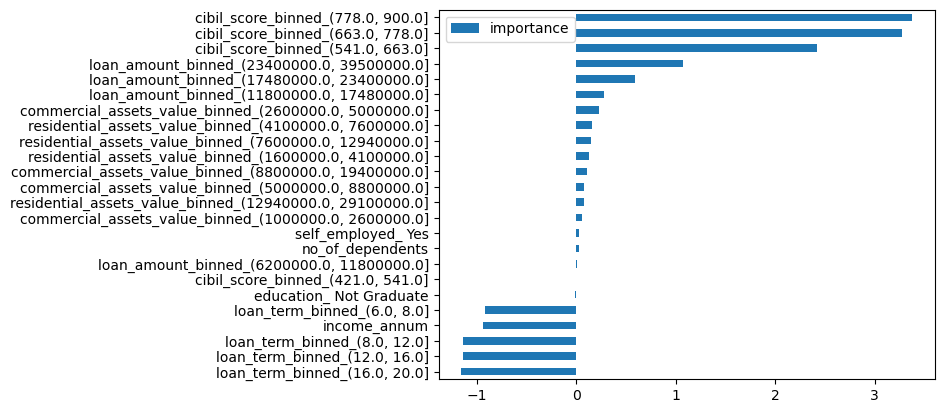

In [166]:
feature_importances = logreg_model.coef_[0]
importances = pd.DataFrame({'importance': feature_importances, 'feature': xnames}, 
                           index=xnames).sort_values(by='importance', ascending=False)
plt.figure(figsize=(20,5))
importances.head()
importances.sort_values(by='importance', ascending=True).plot(kind='barh')

In [167]:
#KNN with Cross Validation to get the optimum model arguments
random.seed(123)
params = {
    "n_neighbors" : [4,8,12,16,20],
    "weights" : ['uniform','distance'],
}
clf = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=params, scoring='f1',verbose=3)
clf.fit(train_df,ytrain)
clf.best_params_
#{'n_neighbors': 16, 'weights': 'distance'}

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ....n_neighbors=4, weights=uniform;, score=0.866 total time=   0.0s
[CV 2/5] END ....n_neighbors=4, weights=uniform;, score=0.875 total time=   0.0s
[CV 3/5] END ....n_neighbors=4, weights=uniform;, score=0.884 total time=   0.0s
[CV 4/5] END ....n_neighbors=4, weights=uniform;, score=0.869 total time=   0.0s
[CV 5/5] END ....n_neighbors=4, weights=uniform;, score=0.899 total time=   0.0s
[CV 1/5] END ...n_neighbors=4, weights=distance;, score=0.910 total time=   0.0s
[CV 2/5] END ...n_neighbors=4, weights=distance;, score=0.907 total time=   0.0s
[CV 3/5] END ...n_neighbors=4, weights=distance;, score=0.898 total time=   0.0s
[CV 4/5] END ...n_neighbors=4, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END ...n_neighbors=4, weights=distance;, score=0.902 total time=   0.0s
[CV 1/5] END ....n_neighbors=8, weights=uniform;, score=0.915 total time=   0.0s
[CV 2/5] END ....n_neighbors=8, weights=uniform;

{'n_neighbors': 20, 'weights': 'distance'}

              precision    recall  f1-score   support

           0       0.91      0.85      0.88       483
           1       0.91      0.95      0.93       798

    accuracy                           0.91      1281
   macro avg       0.91      0.90      0.90      1281
weighted avg       0.91      0.91      0.91      1281



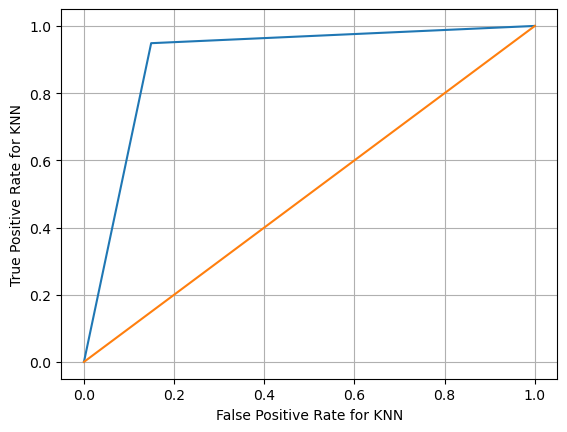



 The AUC for KNN is : 0.8997766154516726


 The time to run the KNN model is 0.17942023277282715  seconds


In [168]:
#Run KNN with the obtained paramters to get the predicted model

t_start=time.time()

model = KNeighborsClassifier(n_neighbors=20, weights='distance') #Run the KNN Model with the parameters {'n_neighbors': 8, 'weights': 'distance'}
model.fit(train_df, ytrain)
y_pred = model.predict(test_df)
print(classification_report(ytest, y_pred))

fpr, tpr, _ = roc_curve(ytest,  y_pred)
auc = roc_auc_score(ytest, y_pred)
plt.figure()
#create ROC curve
plt.plot(fpr,tpr)
line = np.linspace(0,1,100)
plt.plot(line,line)
plt.ylabel('True Positive Rate for KNN')
plt.xlabel('False Positive Rate for KNN')
plt.grid()
plt.show() 

print("\n\n The AUC for KNN is :", auc)
print("\n\n The time to run the KNN model is", time.time()-t_start, " seconds")

In [169]:
#Decision Tree with Cross Validation to get the optimum model arguments
random.seed(123)
params = {
    'max_depth' : [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
}
grid2 = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params, scoring='f1',verbose=3)
grid2.fit(train_df,ytrain)
grid2.best_params_
#max_depth=6

Fitting 5 folds for each of 17 candidates, totalling 85 fits
[CV 1/5] END .......................max_depth=4;, score=0.951 total time=   0.0s
[CV 2/5] END .......................max_depth=4;, score=0.954 total time=   0.0s
[CV 3/5] END .......................max_depth=4;, score=0.948 total time=   0.0s
[CV 4/5] END .......................max_depth=4;, score=0.950 total time=   0.0s
[CV 5/5] END .......................max_depth=4;, score=0.947 total time=   0.0s
[CV 1/5] END .......................max_depth=5;, score=0.947 total time=   0.0s
[CV 2/5] END .......................max_depth=5;, score=0.954 total time=   0.0s
[CV 3/5] END .......................max_depth=5;, score=0.948 total time=   0.0s
[CV 4/5] END .......................max_depth=5;, score=0.949 total time=   0.0s
[CV 5/5] END .......................max_depth=5;, score=0.948 total time=   0.0s
[CV 1/5] END .......................max_depth=6;, score=0.949 total time=   0.0s
[CV 2/5] END .......................max_depth=6;

{'max_depth': 6}

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       483
           1       0.96      0.93      0.94       798

    accuracy                           0.93      1281
   macro avg       0.92      0.93      0.93      1281
weighted avg       0.93      0.93      0.93      1281



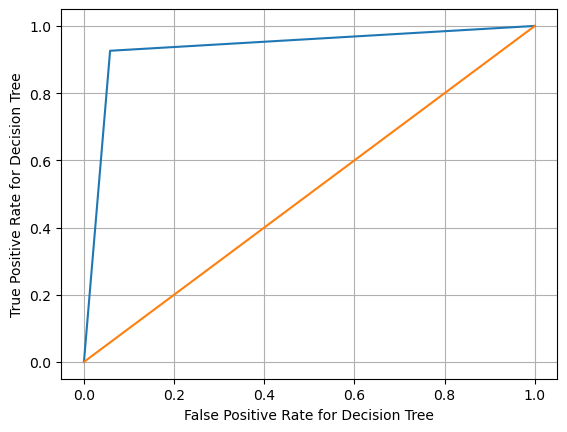



 The AUC for Decision Tree is : 0.9340470742072572


 The time to run the Decision Tree model is 0.13869357109069824  seconds


In [170]:
#Run the Decision Tree with the obtained paramters to get the predicted model

t_start=time.time()

model = DecisionTreeClassifier(max_depth=6) #Run the Decision Tree for the paramters {'max_depth': 15}
model.fit(train_df, ytrain)
y_pred = model.predict(test_df)
print(classification_report(ytest, y_pred))

fpr, tpr, _ = roc_curve(ytest,  y_pred)
auc = roc_auc_score(ytest, y_pred)
plt.figure()
#create ROC curve
plt.plot(fpr,tpr)
line = np.linspace(0,1,100)
plt.plot(line,line)
plt.ylabel('True Positive Rate for Decision Tree')
plt.xlabel('False Positive Rate for Decision Tree')
plt.grid()
plt.show() 

print("\n\n The AUC for Decision Tree is :", auc)
print("\n\n The time to run the Decision Tree model is", time.time()-t_start, " seconds")

<Axes: >

<Figure size 2000x500 with 0 Axes>

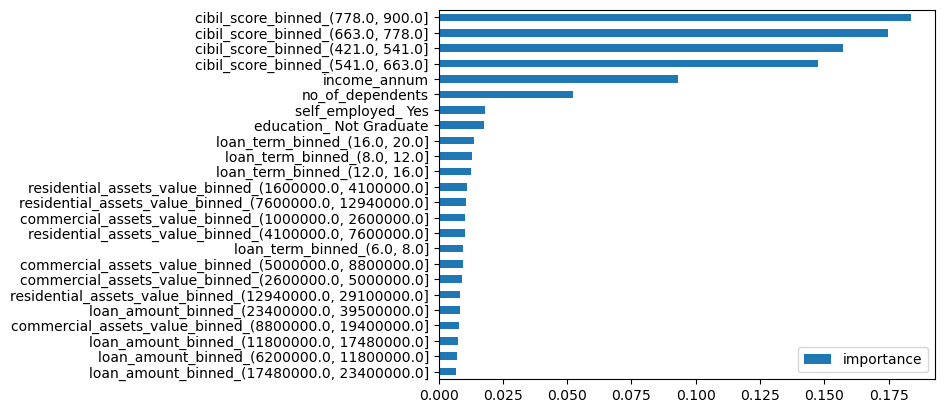

In [174]:
feature_importances = model.feature_importances_
importances = pd.DataFrame({'importance': feature_importances, 'feature': xnames}, 
                           index=xnames).sort_values(by='importance', ascending=False)
plt.figure(figsize=(20,5))
importances.head()
importances.sort_values(by='importance', ascending=True).plot(kind='barh')

In [171]:
#Random Forest with Cross Validation to get the optimum model arguments
random.seed(123)
params = {
    'max_depth' : [3,5,10,15,20,30],
    'n_estimators': [25,100,150]
}
grid2 = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params, scoring='f1',verbose=3)
grid2.fit(train_df,ytrain)
grid2.best_params_ 
#{'max_depth': 10, 'n_estimators': 150}

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END ......max_depth=3, n_estimators=25;, score=0.852 total time=   0.0s
[CV 2/5] END ......max_depth=3, n_estimators=25;, score=0.850 total time=   0.0s
[CV 3/5] END ......max_depth=3, n_estimators=25;, score=0.848 total time=   0.0s
[CV 4/5] END ......max_depth=3, n_estimators=25;, score=0.842 total time=   0.0s
[CV 5/5] END ......max_depth=3, n_estimators=25;, score=0.855 total time=   0.0s
[CV 1/5] END .....max_depth=3, n_estimators=100;, score=0.849 total time=   0.1s
[CV 2/5] END .....max_depth=3, n_estimators=100;, score=0.850 total time=   0.1s
[CV 3/5] END .....max_depth=3, n_estimators=100;, score=0.841 total time=   0.1s
[CV 4/5] END .....max_depth=3, n_estimators=100;, score=0.842 total time=   0.1s
[CV 5/5] END .....max_depth=3, n_estimators=100;, score=0.855 total time=   0.2s
[CV 1/5] END .....max_depth=3, n_estimators=150;, score=0.849 total time=   0.2s
[CV 2/5] END .....max_depth=3, n_estimators=150;

{'max_depth': 30, 'n_estimators': 150}

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       483
           1       0.96      0.94      0.95       798

    accuracy                           0.94      1281
   macro avg       0.93      0.93      0.93      1281
weighted avg       0.94      0.94      0.94      1281
 




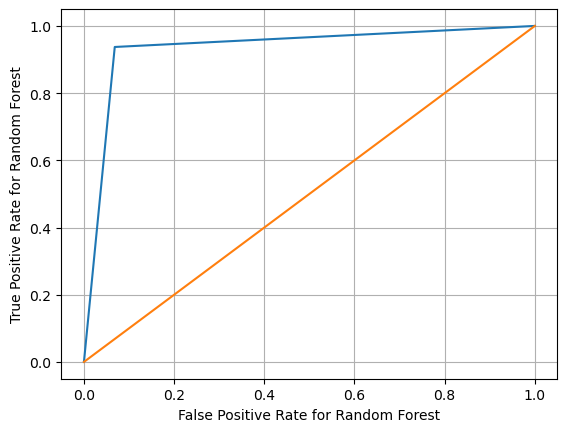



 The AUC for Random Forest is : 0.9345101885147652


 The time to run the Random Forest model is 0.6997683048248291  seconds


In [172]:
#Run Random Forest with the obtained paramters to get the predicted model

t_start=time.time()

model = RandomForestClassifier(max_depth=30, n_estimators=150) #Run the Random Forest model for the parameters {'max_depth': 30, 'n_estimators': 150}
model.fit(train_df, ytrain)
y_pred = model.predict(test_df)
print(classification_report(ytest, y_pred),"\n\n")

fpr, tpr, _ = roc_curve(ytest,  y_pred)
auc = roc_auc_score(ytest, y_pred)
plt.figure()
#create ROC curve
plt.plot(fpr,tpr)
line = np.linspace(0,1,100)
plt.plot(line,line)
plt.ylabel('True Positive Rate for Random Forest')
plt.xlabel('False Positive Rate for Random Forest')
plt.grid()
plt.show() 

print("\n\n The AUC for Random Forest is :", auc)
print("\n\n The time to run the Random Forest model is", time.time()-t_start, " seconds")

<Axes: >

<Figure size 2000x500 with 0 Axes>

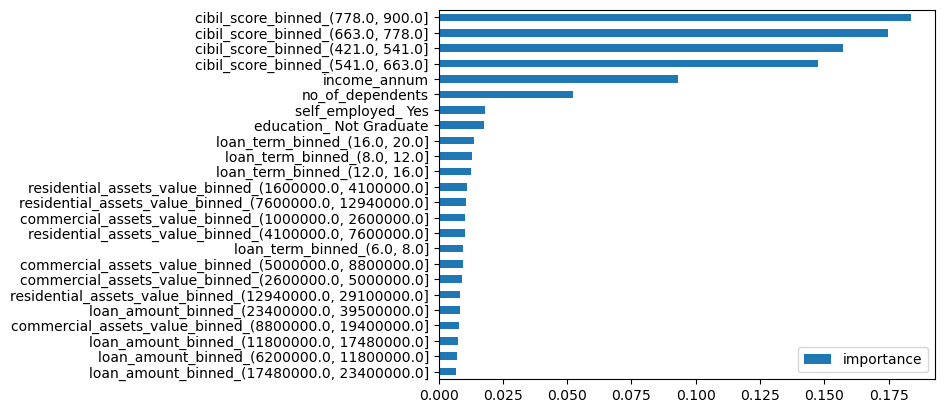

In [173]:
feature_importances = model.feature_importances_
importances = pd.DataFrame({'importance': feature_importances, 'feature': xnames}, 
                           index=xnames).sort_values(by='importance', ascending=False)
plt.figure(figsize=(20,5))
importances.head()
importances.sort_values(by='importance', ascending=True).plot(kind='barh')

In [176]:
#Gradient Boosting with Cross Validation to get the optimum model arguments

random.seed(123)
params = {
    'n_estimators': [100,200,300,400,500],
    'learning_rate' : [0.01,0.05,0.1],
    'max_depth' : [4,6,8]
}
grid2 = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=params, scoring='f1',verbose=3)
grid2.fit(train_df,ytrain)
grid2.best_params_ 
#(0.5,200)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV 1/5] END learning_rate=0.01, max_depth=4, n_estimators=100;, score=0.952 total time=   0.3s
[CV 2/5] END learning_rate=0.01, max_depth=4, n_estimators=100;, score=0.957 total time=   0.3s
[CV 3/5] END learning_rate=0.01, max_depth=4, n_estimators=100;, score=0.948 total time=   0.3s
[CV 4/5] END learning_rate=0.01, max_depth=4, n_estimators=100;, score=0.952 total time=   0.4s
[CV 5/5] END learning_rate=0.01, max_depth=4, n_estimators=100;, score=0.953 total time=   0.2s
[CV 1/5] END learning_rate=0.01, max_depth=4, n_estimators=200;, score=0.954 total time=   0.7s
[CV 2/5] END learning_rate=0.01, max_depth=4, n_estimators=200;, score=0.957 total time=   0.7s
[CV 3/5] END learning_rate=0.01, max_depth=4, n_estimators=200;, score=0.949 total time=   0.7s
[CV 4/5] END learning_rate=0.01, max_depth=4, n_estimators=200;, score=0.952 total time=   0.6s
[CV 5/5] END learning_rate=0.01, max_depth=4, n_estimators=200;, score=0.9

[CV 1/5] END learning_rate=0.05, max_depth=4, n_estimators=300;, score=0.957 total time=   0.8s
[CV 2/5] END learning_rate=0.05, max_depth=4, n_estimators=300;, score=0.949 total time=   1.1s
[CV 3/5] END learning_rate=0.05, max_depth=4, n_estimators=300;, score=0.948 total time=   1.2s
[CV 4/5] END learning_rate=0.05, max_depth=4, n_estimators=300;, score=0.955 total time=   1.1s
[CV 5/5] END learning_rate=0.05, max_depth=4, n_estimators=300;, score=0.956 total time=   1.1s
[CV 1/5] END learning_rate=0.05, max_depth=4, n_estimators=400;, score=0.952 total time=   1.5s
[CV 2/5] END learning_rate=0.05, max_depth=4, n_estimators=400;, score=0.949 total time=   1.7s
[CV 3/5] END learning_rate=0.05, max_depth=4, n_estimators=400;, score=0.945 total time=   1.6s
[CV 4/5] END learning_rate=0.05, max_depth=4, n_estimators=400;, score=0.956 total time=   1.6s
[CV 5/5] END learning_rate=0.05, max_depth=4, n_estimators=400;, score=0.952 total time=   1.3s
[CV 1/5] END learning_rate=0.05, max_dep

[CV 2/5] END learning_rate=0.1, max_depth=4, n_estimators=500;, score=0.951 total time=   1.8s
[CV 3/5] END learning_rate=0.1, max_depth=4, n_estimators=500;, score=0.942 total time=   1.6s
[CV 4/5] END learning_rate=0.1, max_depth=4, n_estimators=500;, score=0.950 total time=   1.9s
[CV 5/5] END learning_rate=0.1, max_depth=4, n_estimators=500;, score=0.955 total time=   1.8s
[CV 1/5] END learning_rate=0.1, max_depth=6, n_estimators=100;, score=0.952 total time=   0.6s
[CV 2/5] END learning_rate=0.1, max_depth=6, n_estimators=100;, score=0.950 total time=   0.6s
[CV 3/5] END learning_rate=0.1, max_depth=6, n_estimators=100;, score=0.937 total time=   0.6s
[CV 4/5] END learning_rate=0.1, max_depth=6, n_estimators=100;, score=0.951 total time=   0.7s
[CV 5/5] END learning_rate=0.1, max_depth=6, n_estimators=100;, score=0.957 total time=   0.6s
[CV 1/5] END learning_rate=0.1, max_depth=6, n_estimators=200;, score=0.946 total time=   1.2s
[CV 2/5] END learning_rate=0.1, max_depth=6, n_est

{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 400}

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       483
           1       0.97      0.93      0.95       798

    accuracy                           0.94      1281
   macro avg       0.93      0.94      0.94      1281
weighted avg       0.94      0.94      0.94      1281



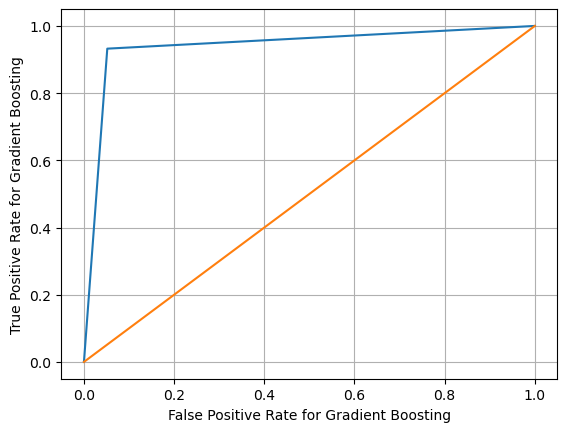



 The AUC for Gradient Boosting is : 0.9402854963495695


 The time to run the Gradient Boosting model is 1.880244493484497  seconds


In [178]:
#Run Gradient Boosting with the obtained paramters to get the predicted model

t_start=time.time()

random.seed(123)
model = GradientBoostingClassifier(max_depth=4,learning_rate=0.01,n_estimators=400) #Running the model using the parameter {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 300}
#model = GradientBoostingClassifier(max_depth=4,learning_rate=0.05,n_estimators=100) #Running the model using the parameter {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 300}
model.fit(train_df,ytrain)
y_pred = model.predict(test_df)
print(classification_report(ytest, y_pred))

fpr, tpr, _ = roc_curve(ytest,  y_pred)
auc = roc_auc_score(ytest, y_pred)
plt.figure()
#create ROC curve
plt.plot(fpr,tpr)
line = np.linspace(0,1,100)
plt.plot(line,line)
plt.ylabel('True Positive Rate for Gradient Boosting')
plt.xlabel('False Positive Rate for Gradient Boosting')
plt.grid()
plt.show() 

print("\n\n The AUC for Gradient Boosting is :", auc)
print("\n\n The time to run the Gradient Boosting model is", time.time()-t_start, " seconds")

<Axes: >

<Figure size 2000x500 with 0 Axes>

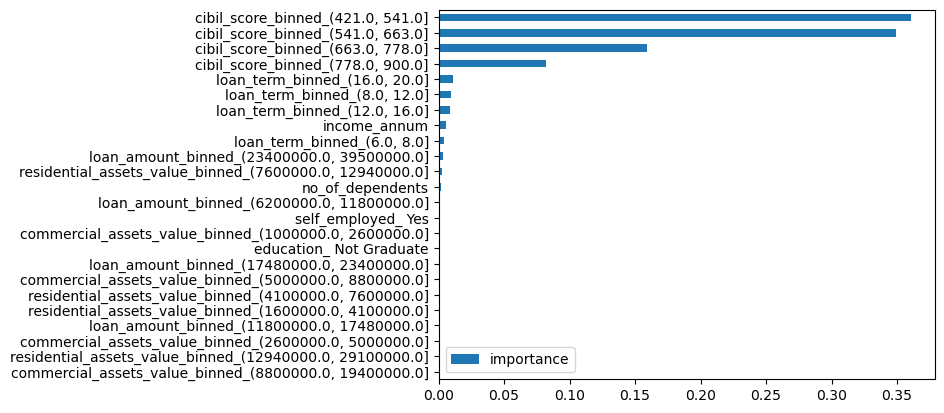

In [179]:
feature_importances = model.feature_importances_
importances = pd.DataFrame({'importance': feature_importances, 'feature': xnames}, 
                           index=xnames).sort_values(by='importance', ascending=False)
plt.figure(figsize=(20,5))
importances.head()
importances.sort_values(by='importance', ascending=True).plot(kind='barh')

In [181]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [182]:
# Neural Network Model
model = keras.Sequential([
    layers.Input(shape=(train_df.shape[1],)),  # Input layer
    layers.Dense(64, activation='relu'),       # Hidden layer with ReLU activation
    layers.Dense(32, activation='relu'),       # Hidden layer with ReLU activation
    layers.Dense(1, activation='sigmoid')      # Output layer with sigmoid activation
])

optimizer = keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
t_start = time.time()
history = model.fit(train_df, ytrain, epochs=10, batch_size=32, verbose=1)
train_time = time.time() - t_start

# Evaluate the model
y_pred = model.predict(test_df)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert to binary predictions

print("Neural Network Classification Report:")
print(classification_report(ytest, y_pred_binary))

Epoch 1/10
94/94 [==============================] - 1s 2ms/step - loss: 0.4406 - accuracy: 0.8106
Epoch 2/10
94/94 [==============================] - 0s 2ms/step - loss: 0.2328 - accuracy: 0.9367
Epoch 3/10
94/94 [==============================] - 0s 2ms/step - loss: 0.1811 - accuracy: 0.9414
Epoch 4/10
94/94 [==============================] - 0s 2ms/step - loss: 0.1600 - accuracy: 0.9414
Epoch 5/10
94/94 [==============================] - 0s 2ms/step - loss: 0.1484 - accuracy: 0.9424
Epoch 6/10
94/94 [==============================] - 0s 2ms/step - loss: 0.1398 - accuracy: 0.9424
Epoch 7/10
94/94 [==============================] - 0s 2ms/step - loss: 0.1355 - accuracy: 0.9441
Epoch 8/10
94/94 [==============================] - 0s 2ms/step - loss: 0.1290 - accuracy: 0.9475
Epoch 9/10
94/94 [==============================] - 0s 2ms/step - loss: 0.1256 - accuracy: 0.9488
Epoch 10/10
41/41 [==============================] - 0s 1ms/step
Neural Network Classification Report:
              p

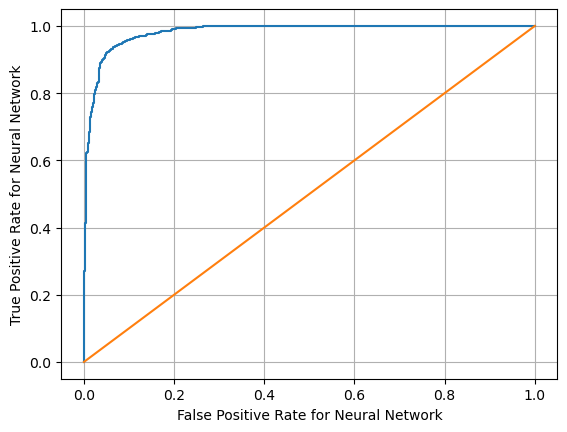



 The AUC for Neural Network is: 0.9824250066159187


 The time to run the Neural Network model is 2.8861422538757324 seconds


In [183]:
# ROC curve and AUC
fpr, tpr, _ = roc_curve(ytest, y_pred)
auc = roc_auc_score(ytest, y_pred)
plt.figure()
plt.plot(fpr, tpr)
plt.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
plt.ylabel('True Positive Rate for Neural Network')
plt.xlabel('False Positive Rate for Neural Network')
plt.grid()
plt.show()

print("\n\n The AUC for Neural Network is:", auc)
print("\n\n The time to run the Neural Network model is", train_time,"seconds")

In [185]:
source_df.head()

,no_of_dependents,education,self_employed,income_annum,loan_status,cibil_score_binned,loan_term_binned,loan_amount_binned,commercial_assets_value_binned,residential_assets_value_binned
0,2,Graduate,No,9600000,Approved,"(663.0, 778.0]","(8.0, 12.0]","(23400000.0, 39500000.0]","(8800000.0, 19400000.0]","(1600000.0, 4100000.0]"
1,0,Not Graduate,Yes,4100000,Rejected,"(299.999, 421.0]","(6.0, 8.0]","(11800000.0, 17480000.0]","(1000000.0, 2600000.0]","(1600000.0, 4100000.0]"
2,3,Graduate,No,9100000,Rejected,"(421.0, 541.0]","(16.0, 20.0]","(23400000.0, 39500000.0]","(2600000.0, 5000000.0]","(4100000.0, 7600000.0]"
3,3,Graduate,No,8200000,Rejected,"(421.0, 541.0]","(6.0, 8.0]","(23400000.0, 39500000.0]","(2600000.0, 5000000.0]","(12940000.0, 29100000.0]"
4,5,Not Graduate,Yes,9800000,Rejected,"(299.999, 421.0]","(16.0, 20.0]","(23400000.0, 39500000.0]","(5000000.0, 8800000.0]","(7600000.0, 12940000.0]"


In [247]:
#X_2=source_df[[source_df.columns[0],source_df.columns[1],source_df.columns[2],source_df.columns[5],source_df.columns[6]]]
X_2=source_df[[source_df.columns[0],source_df.columns[1],source_df.columns[2],source_df.columns[3],source_df.columns[5]
              ,source_df.columns[6]]]

In [248]:
Y_df_2=source_df['loan_status'].apply(lambda x: 1 if x.strip()=="Approved" else 0 )

In [249]:
X2_df=pd.get_dummies(X_2,drop_first=True) 

In [250]:
X2_df = preprocessing.StandardScaler().fit_transform(X2_df)

In [251]:
train_df_2, test_df_2, ytrain_2, ytest_2 = train_test_split(X2_df, Y_df_2, test_size=0.3, random_state=1)

In [252]:
#Random Forest with Cross Validation to get the optimum model arguments
random.seed(123)
params = {
    'max_depth' : [3,5,10,15,20,30],
    'n_estimators': [25,100,150]
}
grid2 = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params, scoring='f1',verbose=3)
grid2.fit(train_df_2,ytrain_2)
grid2.best_params_ 
#{'max_depth': 10, 'n_estimators': 150}

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END ......max_depth=3, n_estimators=25;, score=0.873 total time=   0.0s
[CV 2/5] END ......max_depth=3, n_estimators=25;, score=0.850 total time=   0.0s
[CV 3/5] END ......max_depth=3, n_estimators=25;, score=0.841 total time=   0.0s
[CV 4/5] END ......max_depth=3, n_estimators=25;, score=0.842 total time=   0.0s
[CV 5/5] END ......max_depth=3, n_estimators=25;, score=0.901 total time=   0.0s
[CV 1/5] END .....max_depth=3, n_estimators=100;, score=0.849 total time=   0.1s
[CV 2/5] END .....max_depth=3, n_estimators=100;, score=0.850 total time=   0.1s
[CV 3/5] END .....max_depth=3, n_estimators=100;, score=0.845 total time=   0.1s
[CV 4/5] END .....max_depth=3, n_estimators=100;, score=0.843 total time=   0.1s
[CV 5/5] END .....max_depth=3, n_estimators=100;, score=0.855 total time=   0.1s
[CV 1/5] END .....max_depth=3, n_estimators=150;, score=0.849 total time=   0.2s
[CV 2/5] END .....max_depth=3, n_estimators=150;

{'max_depth': 5, 'n_estimators': 25}

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       483
           1       0.97      0.93      0.95       798

    accuracy                           0.94      1281
   macro avg       0.93      0.94      0.93      1281
weighted avg       0.94      0.94      0.94      1281
 




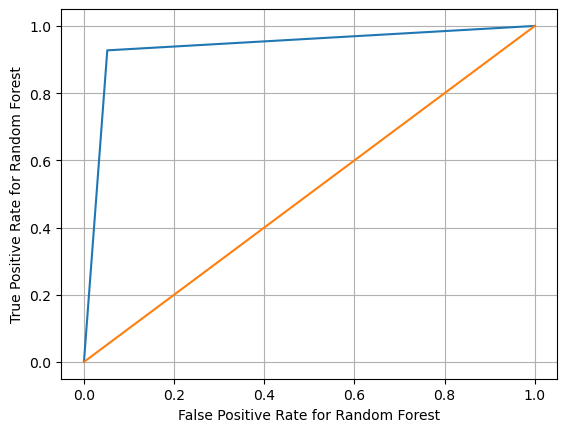



 The AUC for Random Forest is : 0.9377792306854091


 The time to run the Random Forest model is 0.2714529037475586  seconds


In [253]:
#Run Random Forest with the obtained paramters to get the predicted model

t_start=time.time()

model = RandomForestClassifier(max_depth=5, n_estimators=25) #Run the Random Forest model for the parameters {'max_depth': 30, 'n_estimators': 150}
model.fit(train_df_2, ytrain_2)
y_pred_2 = model.predict(test_df_2)
print(classification_report(ytest_2, y_pred_2),"\n\n")

fpr, tpr, _ = roc_curve(ytest_2,  y_pred_2)
auc = roc_auc_score(ytest_2, y_pred_2)
plt.figure()
#create ROC curve
plt.plot(fpr,tpr)
line = np.linspace(0,1,100)
plt.plot(line,line)
plt.ylabel('True Positive Rate for Random Forest')
plt.xlabel('False Positive Rate for Random Forest')
plt.grid()
plt.show() 

print("\n\n The AUC for Random Forest is :", auc)
print("\n\n The time to run the Random Forest model is", time.time()-t_start, " seconds")

In [254]:
# Neural Network Model
model = keras.Sequential([
    layers.Input(shape=(train_df_2.shape[1],)),  # Input layer
    layers.Dense(64, activation='relu'),       # Hidden layer with ReLU activation
    layers.Dense(32, activation='relu'),       # Hidden layer with ReLU activation
    layers.Dense(1, activation='sigmoid')      # Output layer with sigmoid activation
])

optimizer = keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
t_start = time.time()
history = model.fit(train_df_2, ytrain_2, epochs=10, batch_size=32, verbose=1)
train_time = time.time() - t_start

# Evaluate the model
y_pred = model.predict(test_df_2)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert to binary predictions

print("Neural Network Classification Report:")
print(classification_report(ytest_2, y_pred_binary))

Epoch 1/10
94/94 [==============================] - 1s 2ms/step - loss: 0.3733 - accuracy: 0.8544
Epoch 2/10
94/94 [==============================] - 0s 2ms/step - loss: 0.2025 - accuracy: 0.9401
Epoch 3/10
94/94 [==============================] - 0s 2ms/step - loss: 0.1716 - accuracy: 0.9414
Epoch 4/10
94/94 [==============================] - 0s 1ms/step - loss: 0.1606 - accuracy: 0.9411
Epoch 5/10
94/94 [==============================] - 0s 2ms/step - loss: 0.1555 - accuracy: 0.9411
Epoch 6/10
94/94 [==============================] - 0s 1ms/step - loss: 0.1523 - accuracy: 0.9401
Epoch 7/10
94/94 [==============================] - 0s 2ms/step - loss: 0.1502 - accuracy: 0.9408
Epoch 8/10
94/94 [==============================] - 0s 1ms/step - loss: 0.1482 - accuracy: 0.9414
Epoch 9/10
94/94 [==============================] - 0s 1ms/step - loss: 0.1465 - accuracy: 0.9394
Epoch 10/10
41/41 [==============================] - 0s 2ms/step
Neural Network Classification Report:
              p

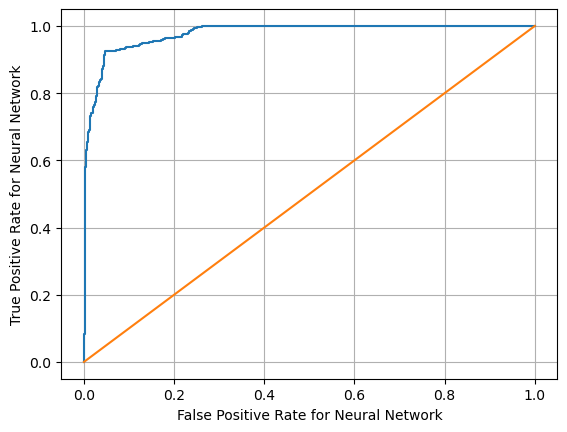



 The AUC for Neural Network is: 0.9780195831192889


 The time to run the Neural Network model is 2.0553321838378906 seconds


In [255]:
# ROC curve and AUC
fpr, tpr, _ = roc_curve(ytest_2, y_pred)
auc = roc_auc_score(ytest_2, y_pred)
plt.figure()
plt.plot(fpr, tpr)
plt.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
plt.ylabel('True Positive Rate for Neural Network')
plt.xlabel('False Positive Rate for Neural Network')
plt.grid()
plt.show()

print("\n\n The AUC for Neural Network is:", auc)
print("\n\n The time to run the Neural Network model is", train_time,"seconds")